In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def polynom_orig(x):
    return np.sin(2 * np.pi * x)

def polynom_new(x, w):
    y = 0
    for i in range(len(w)):
        y += w[i] * (x ** i)
    return y

def error(x):
    return polynom_orig(x) + random.normalvariate(0.0, 0.3)

def gen(points):
    x = np.sort(np.random.uniform(0, 1., points))
    y = np.array(list(map(error, x)))
    return x, y

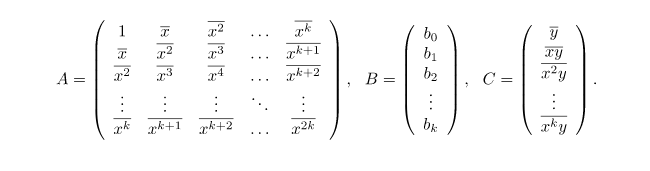

In [3]:
def calculate_weights(x, y, d, l):
  # calculate C
  C = []
  for i in range(d + 1):
    C.append(np.sum((x ** i) * y))
  
  A = []
  for i in range(d + 1):
    a = []
    for j in range(d + 1):
      a.append(np.sum(x ** (i + j)))
      if (i == j):
        a[j] += l
    A.append(a)
  
  return np.linalg.solve(A, C)

In [4]:
N = 20
x, y = gen(N)
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(N):
  if i % 2 == 0:
    X_train.append(x[i])
    y_train.append(y[i])
  else:
    X_test.append(x[i])
    y_test.append(y[i])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

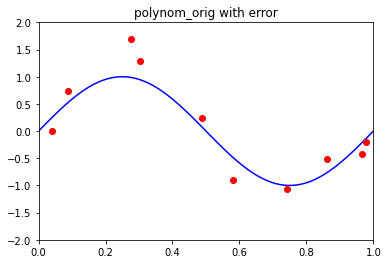

In [5]:
z = np.linspace(0., 1., 100)
plt.title('polynom_orig with error')
plt.plot(z, polynom_orig(z), 'b-')
plt.plot(X_test, y_test, 'ro')
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

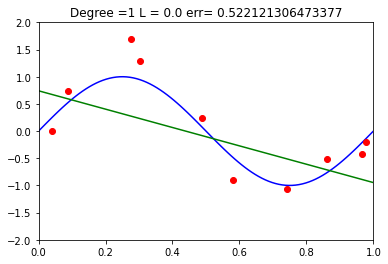

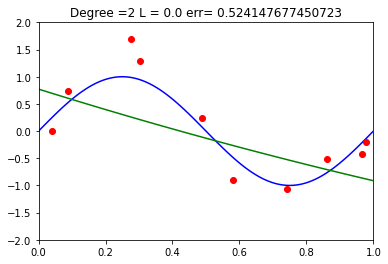

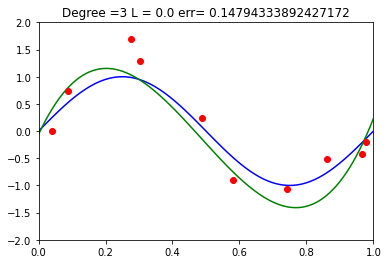

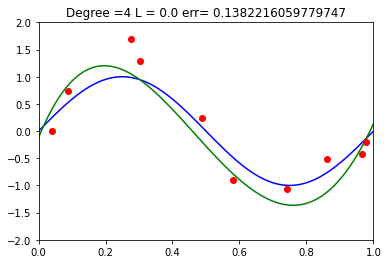

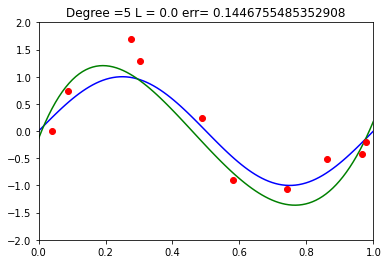

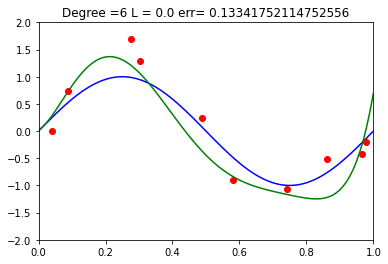

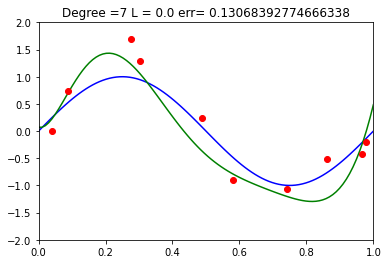

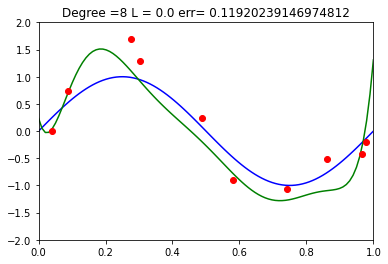

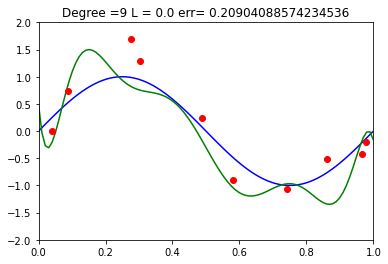

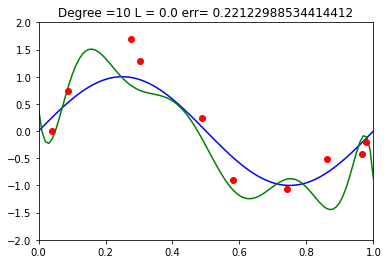

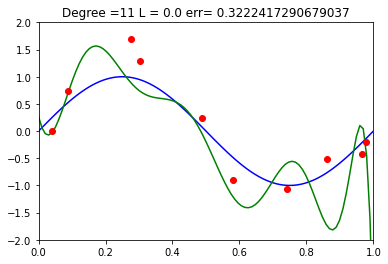

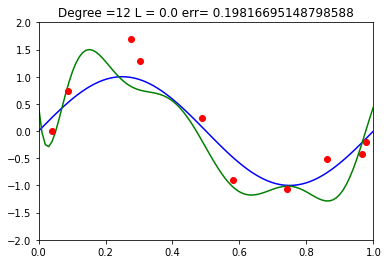

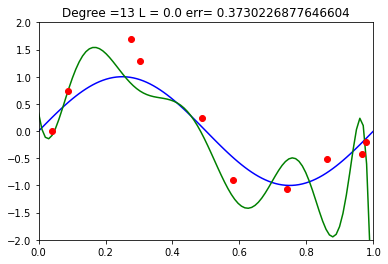

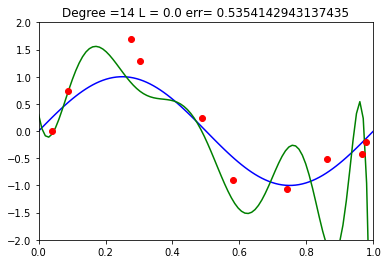

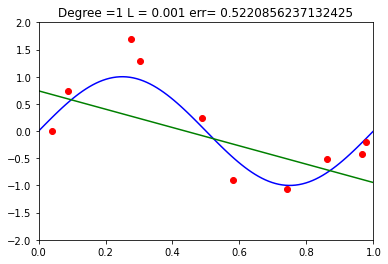

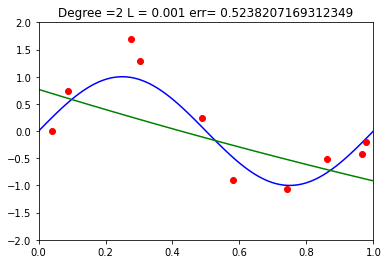

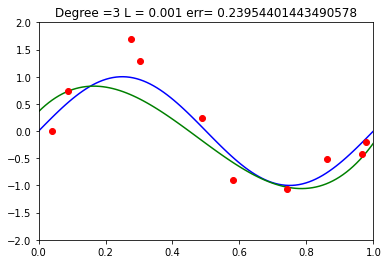

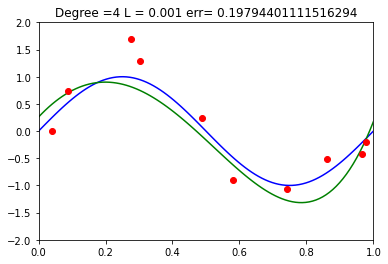

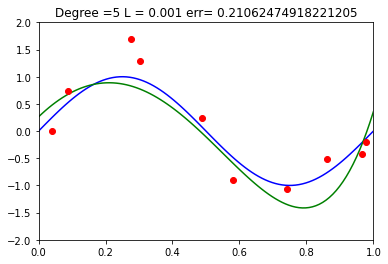

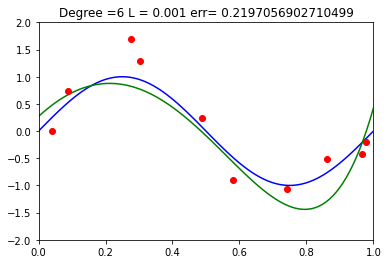

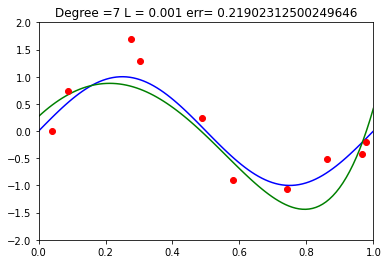

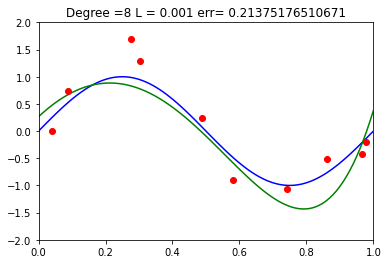

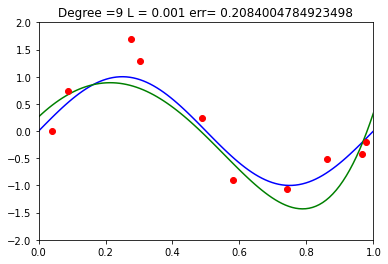

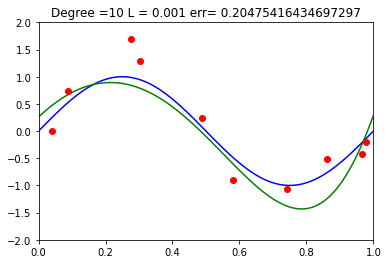

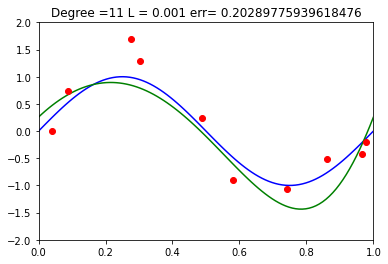

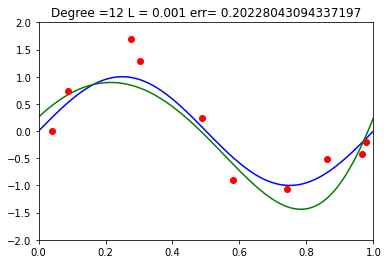

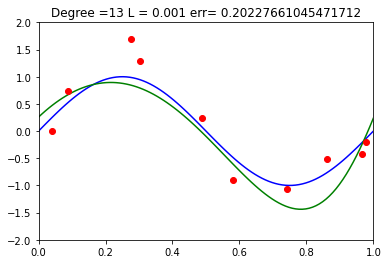

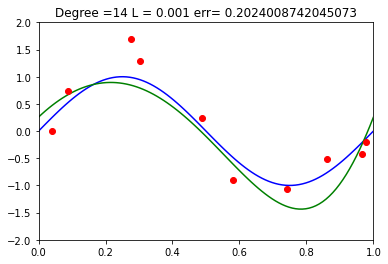

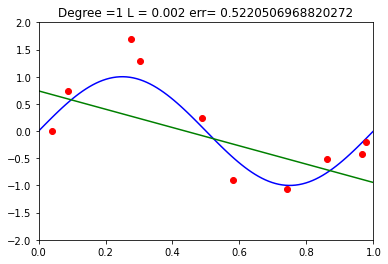

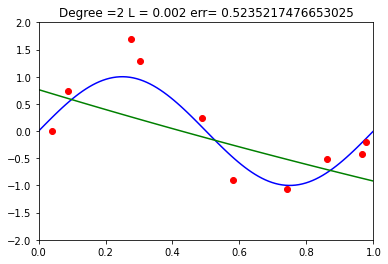

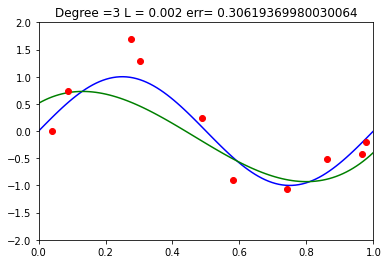

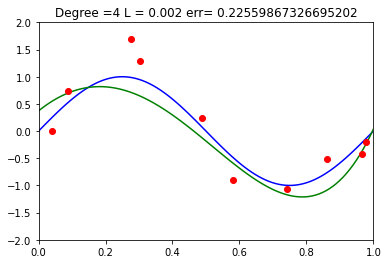

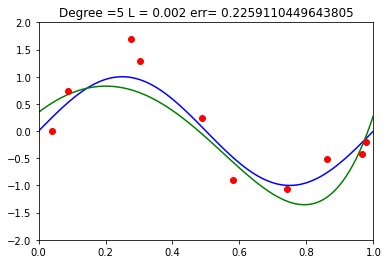

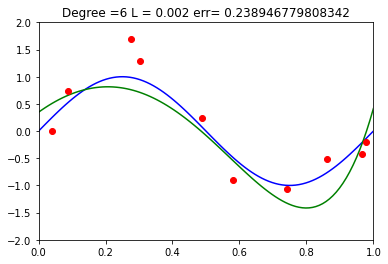

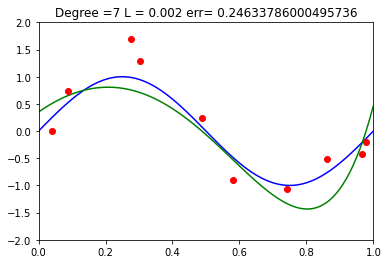

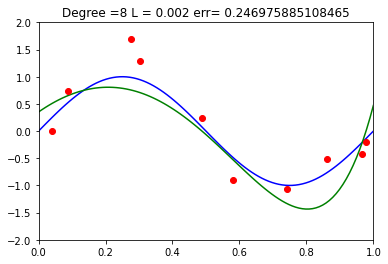

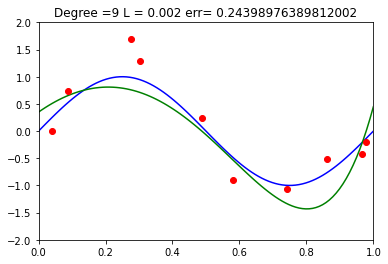

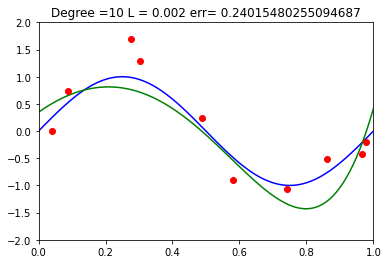

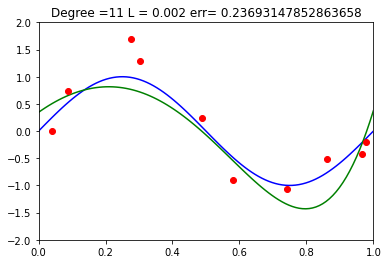

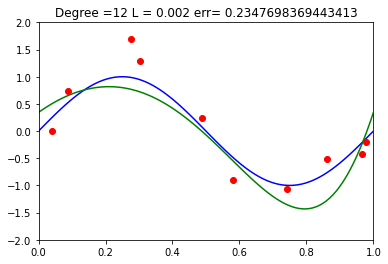

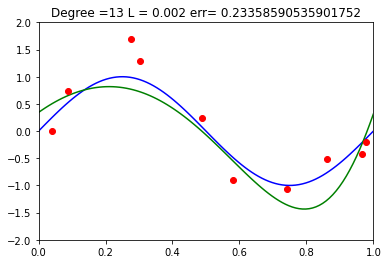

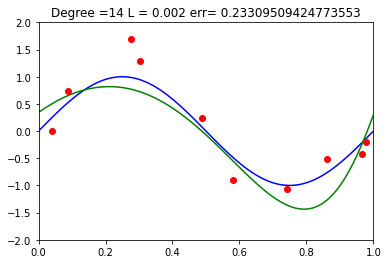

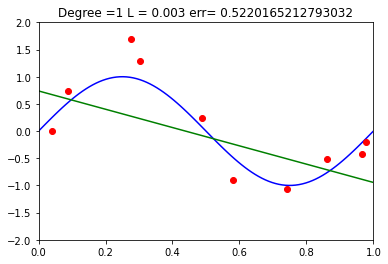

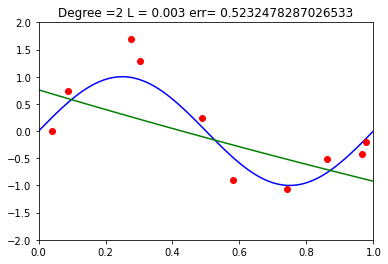

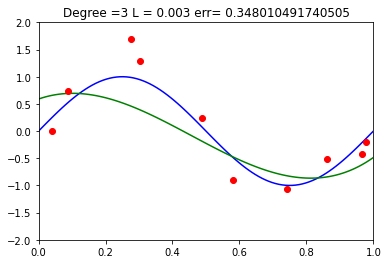

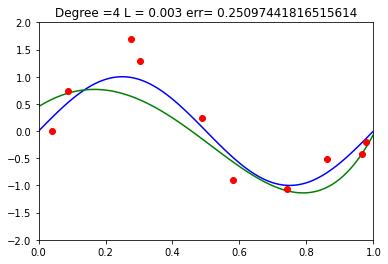

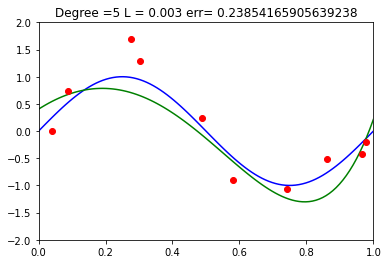

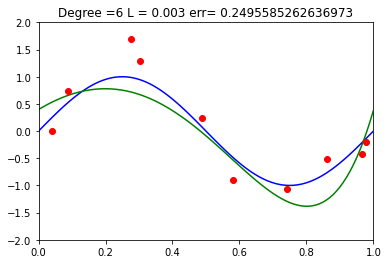

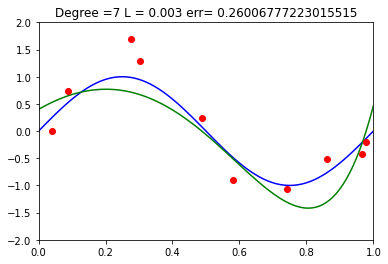

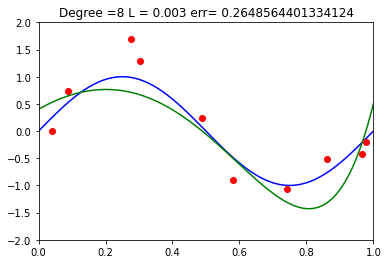

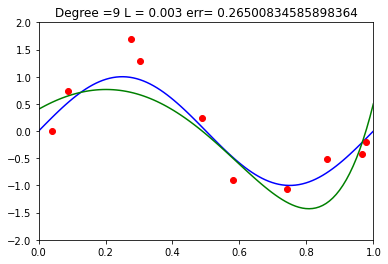

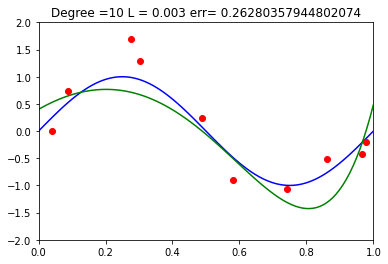

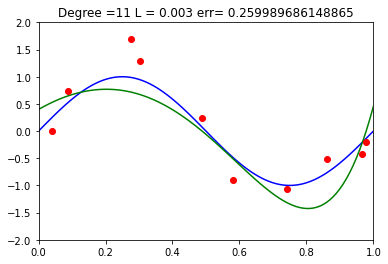

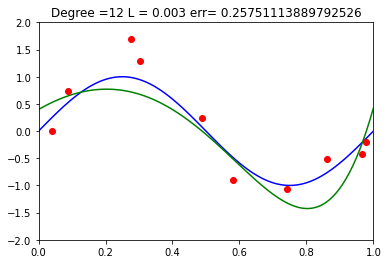

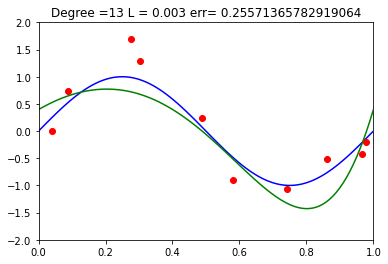

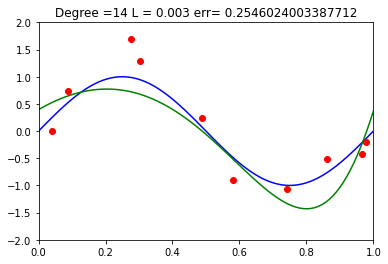

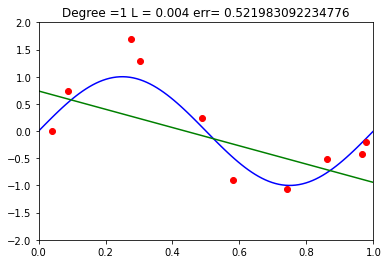

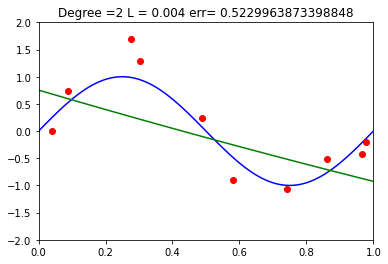

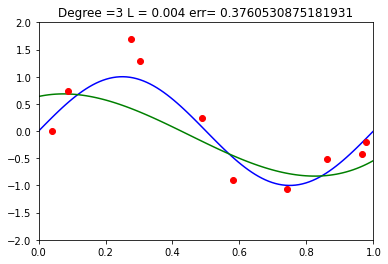

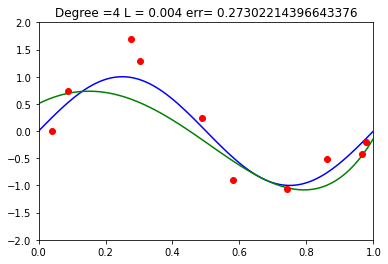

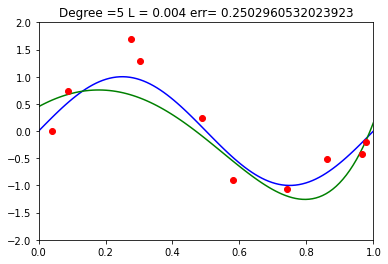

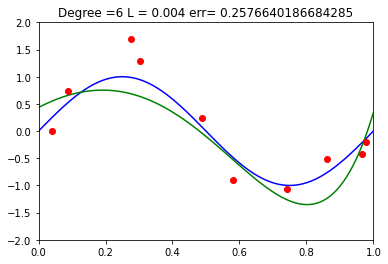

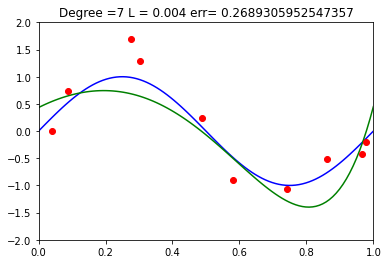

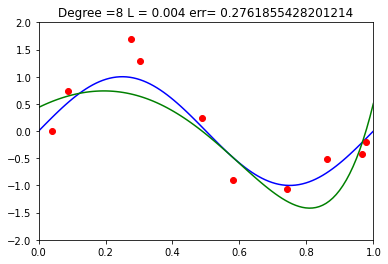

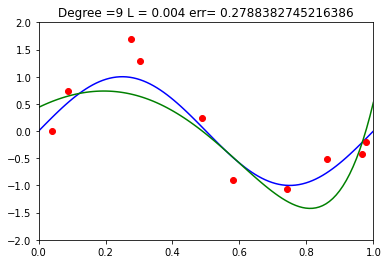

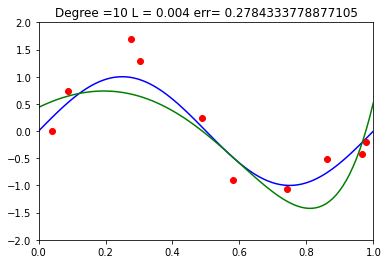

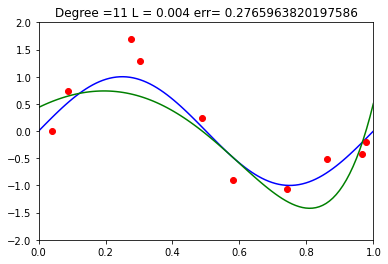

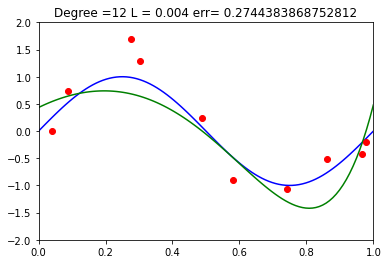

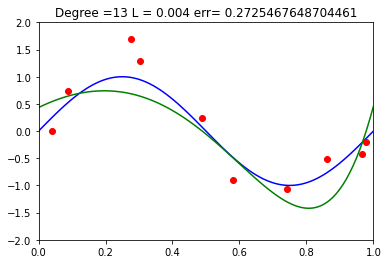

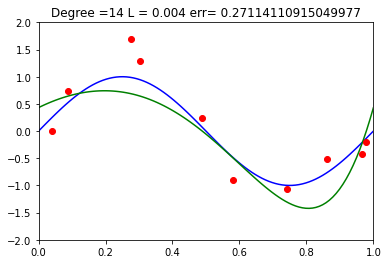

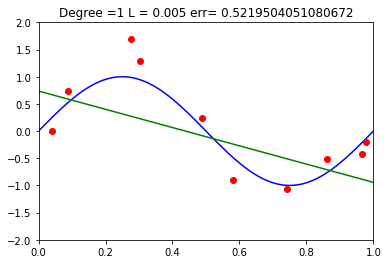

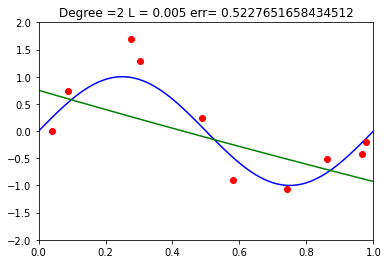

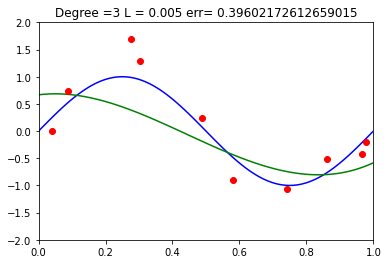

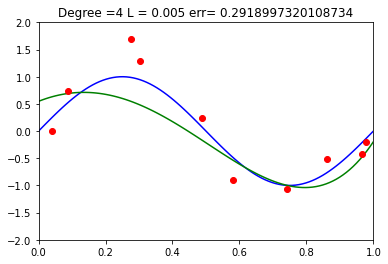

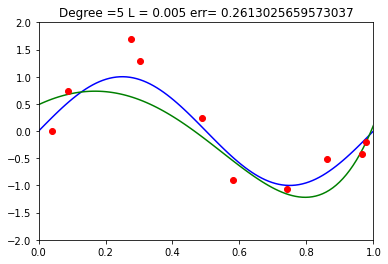

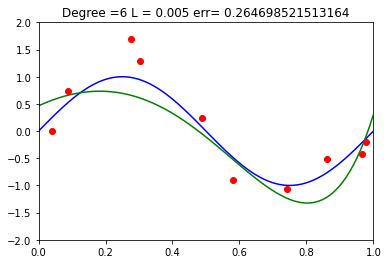

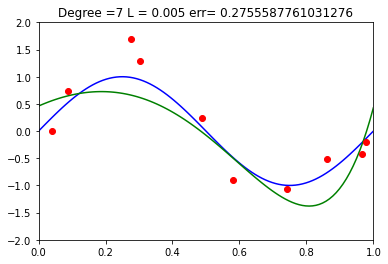

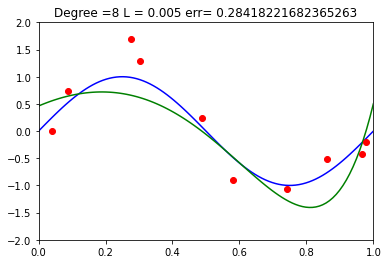

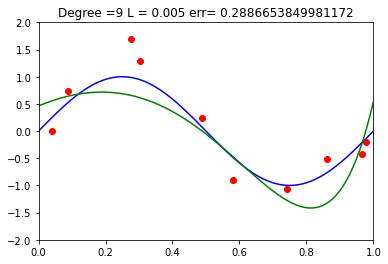

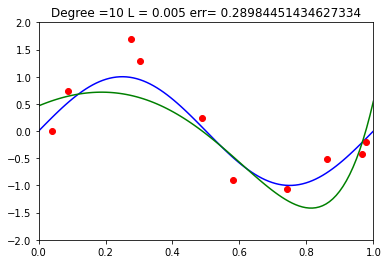

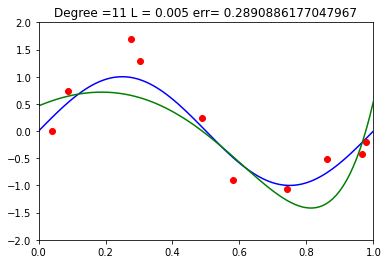

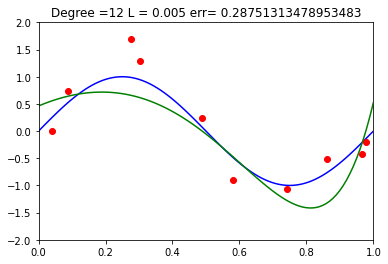

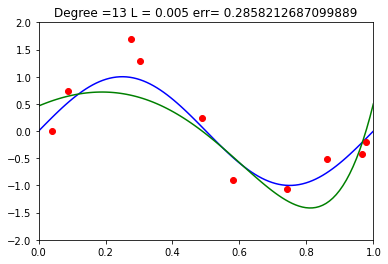

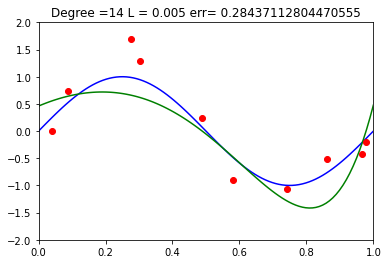

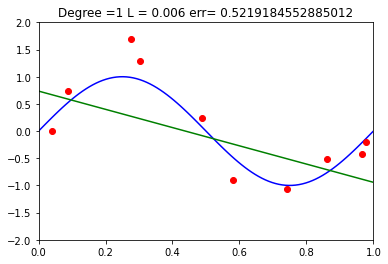

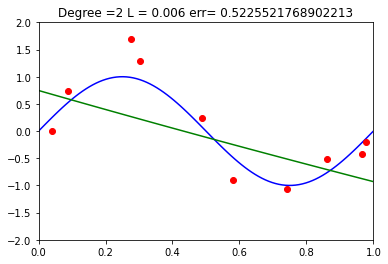

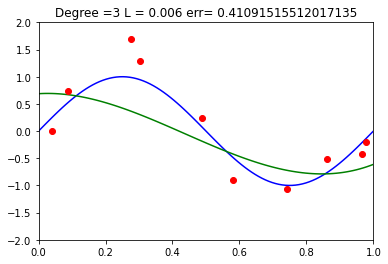

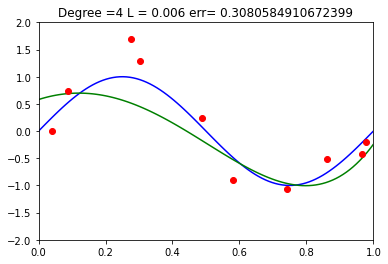

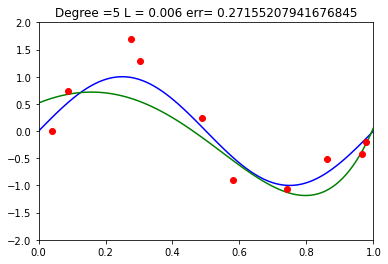

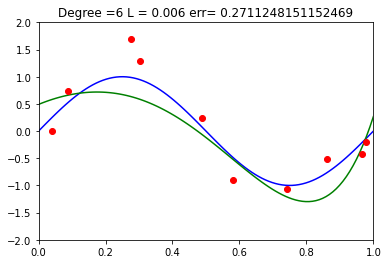

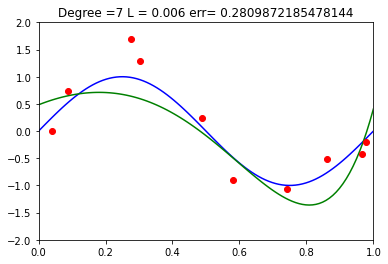

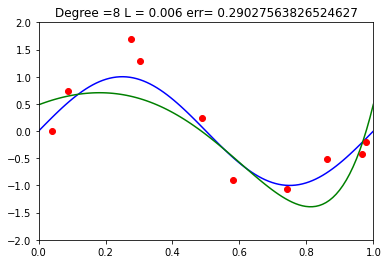

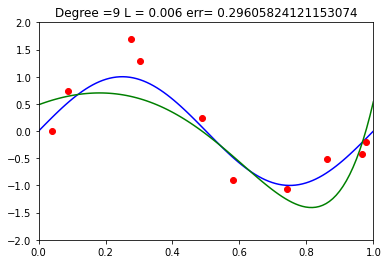

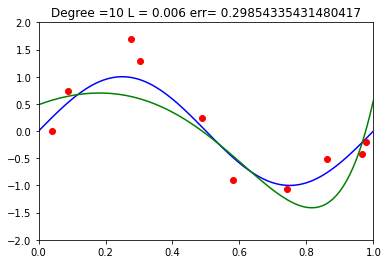

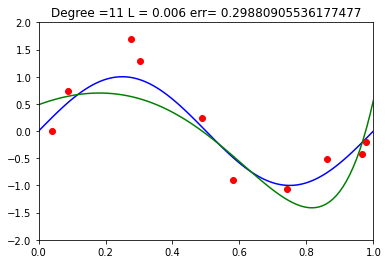

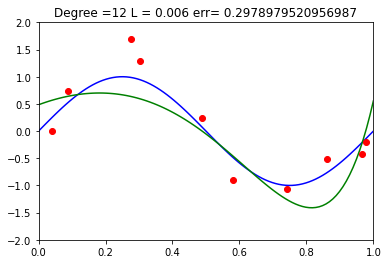

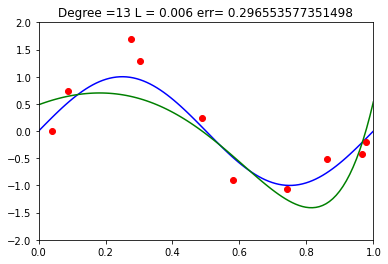

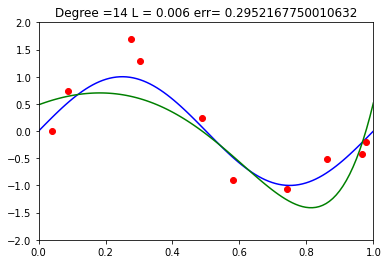

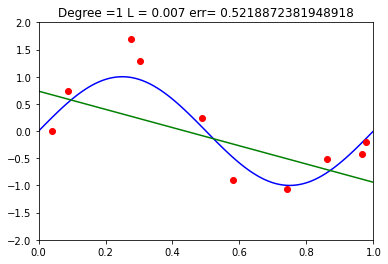

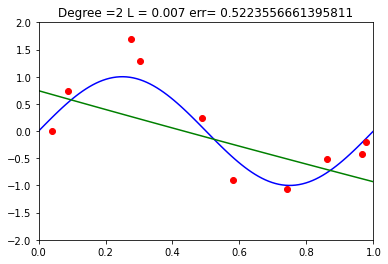

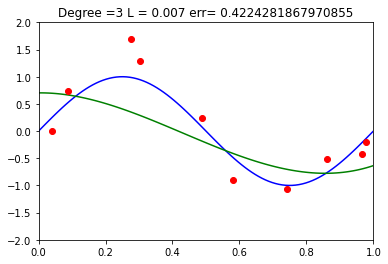

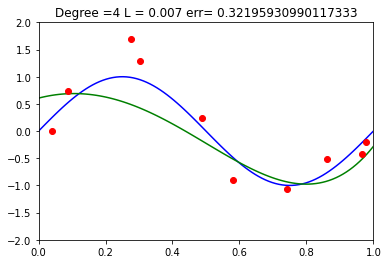

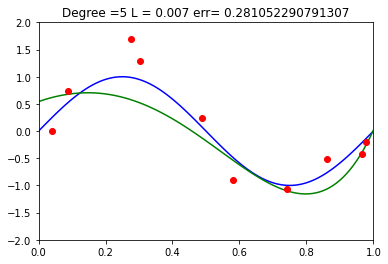

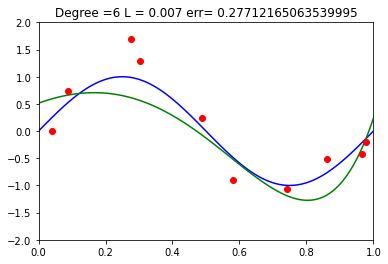

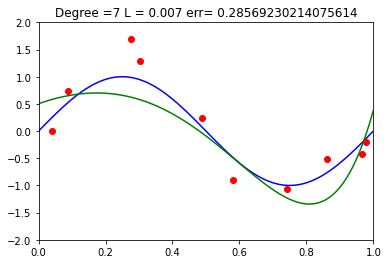

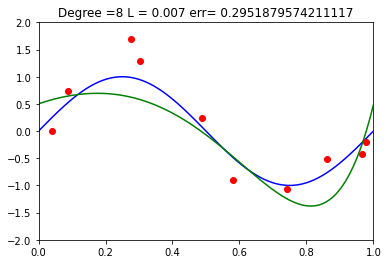

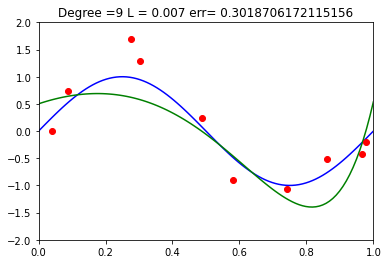

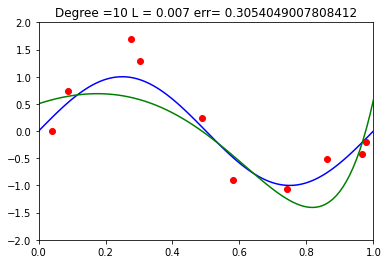

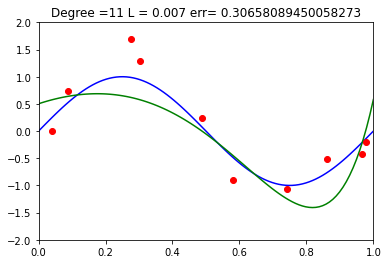

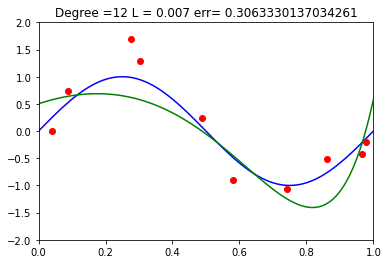

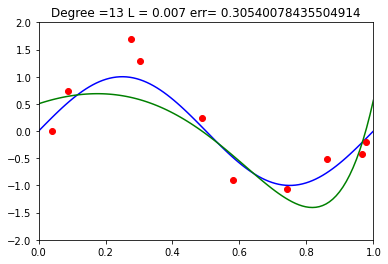

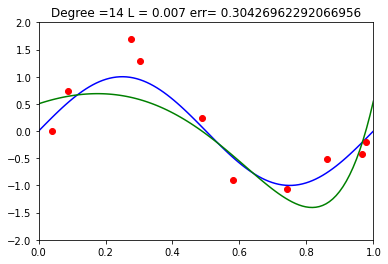

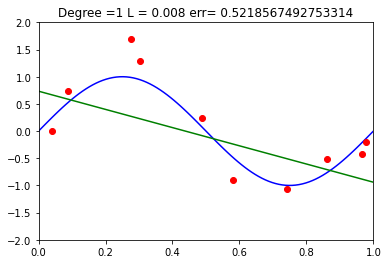

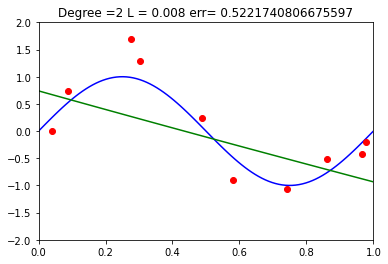

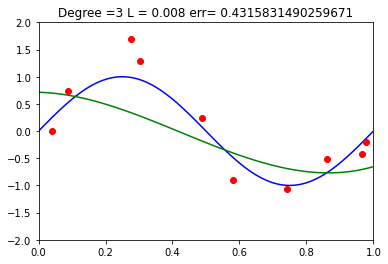

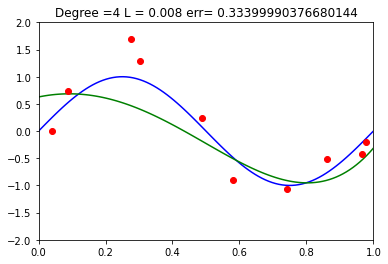

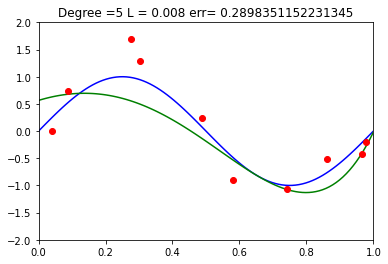

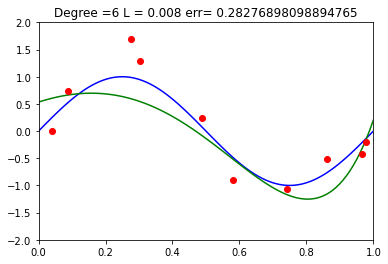

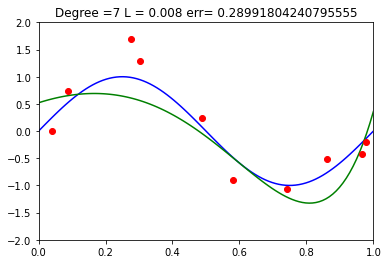

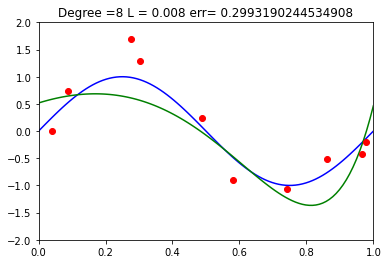

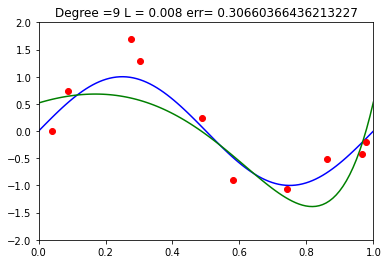

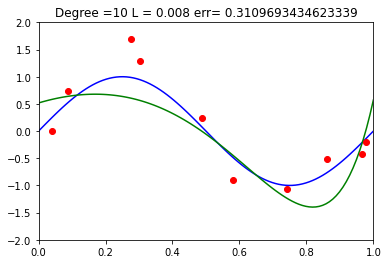

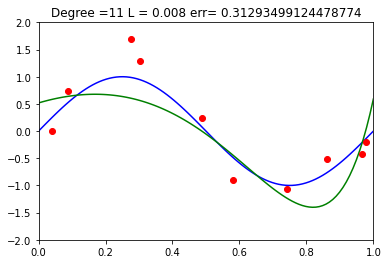

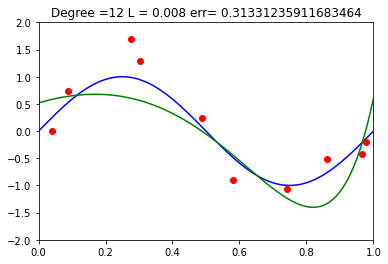

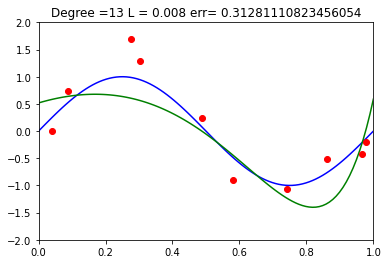

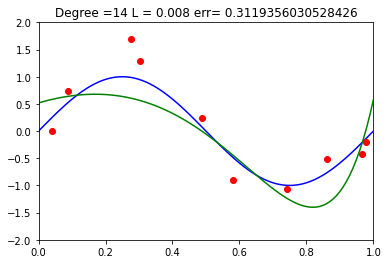

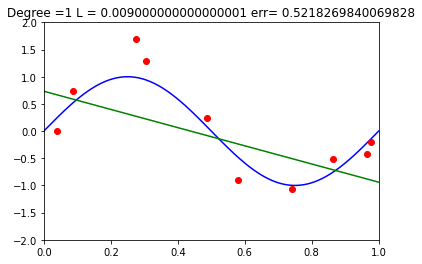

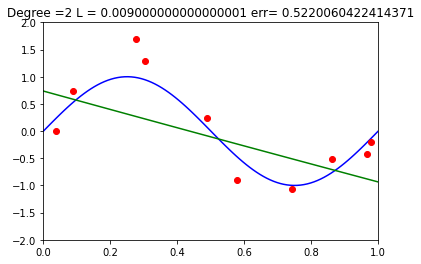

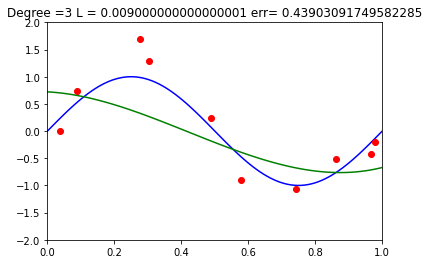

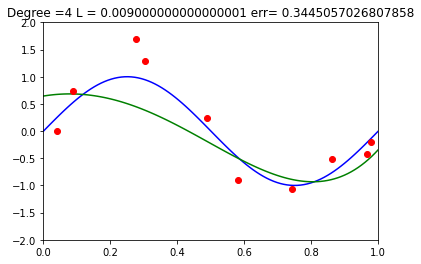

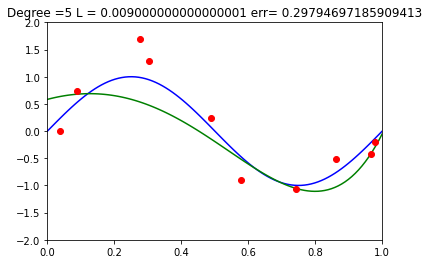

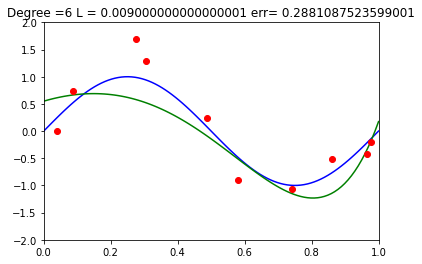

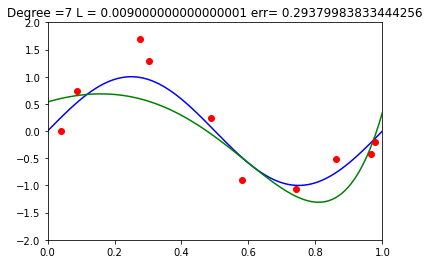

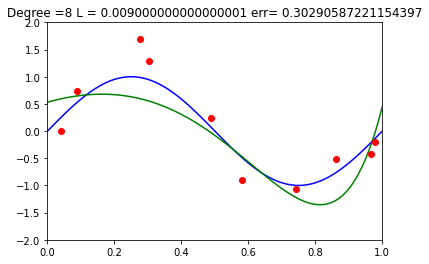

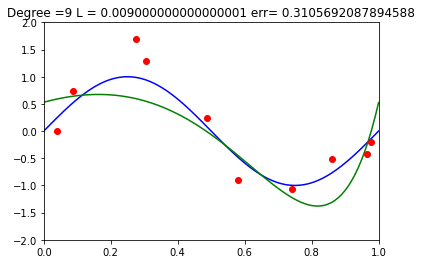

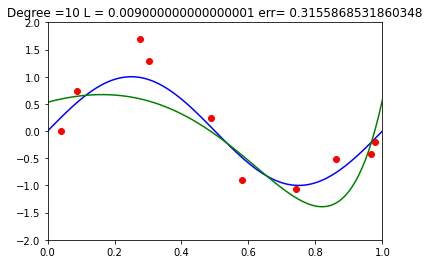

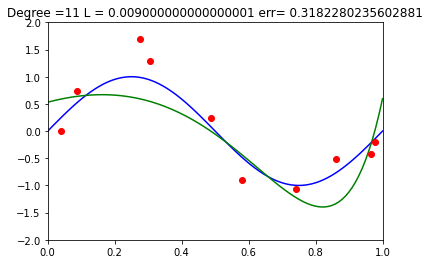

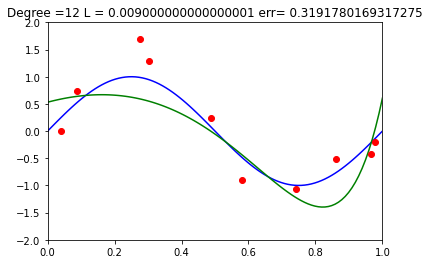

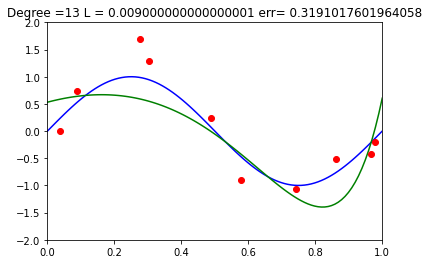

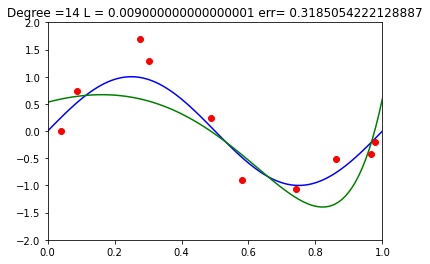

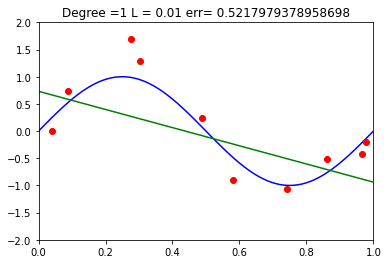

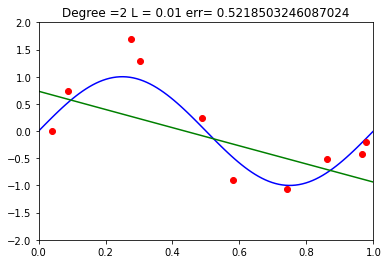

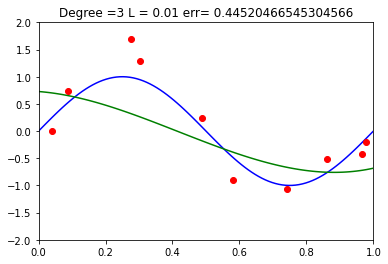

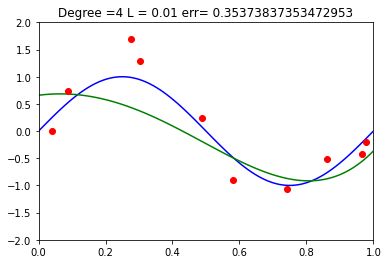

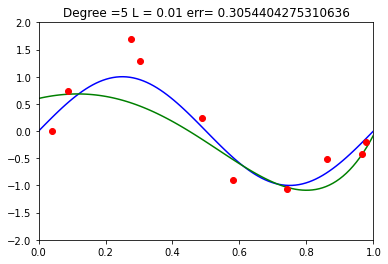

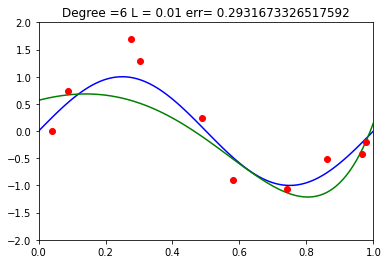

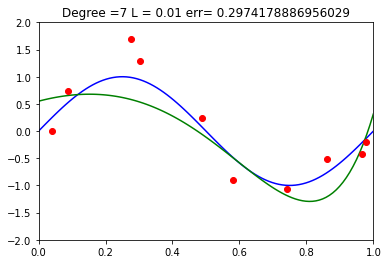

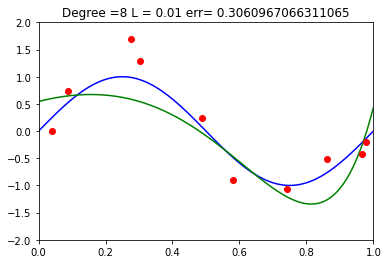

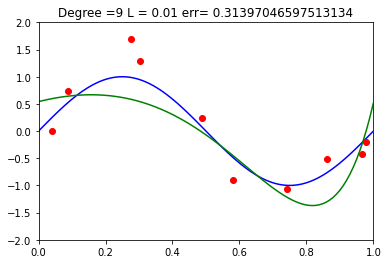

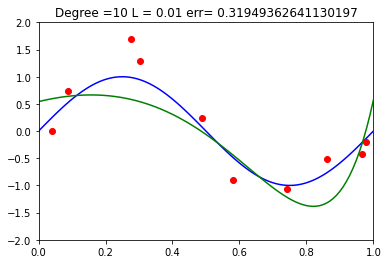

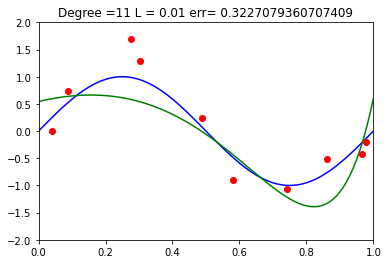

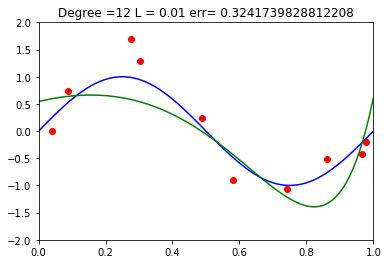

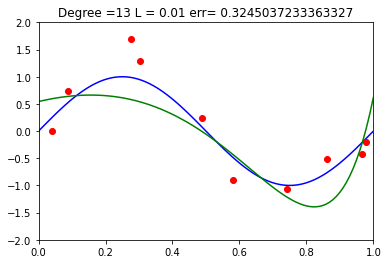

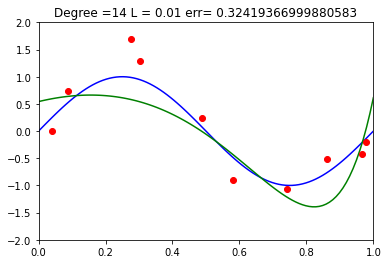

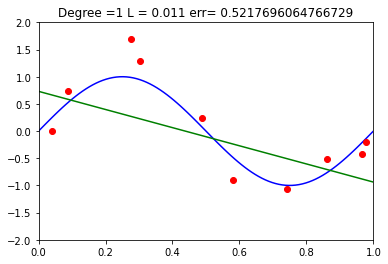

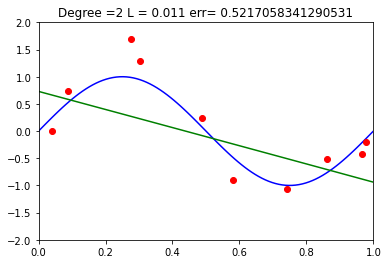

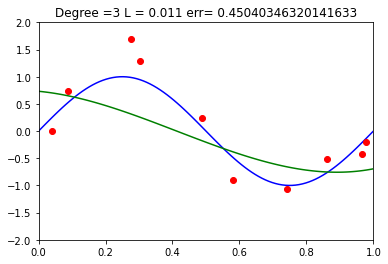

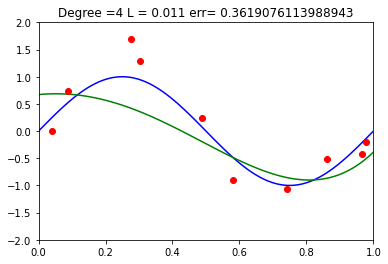

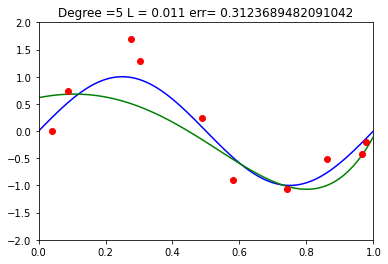

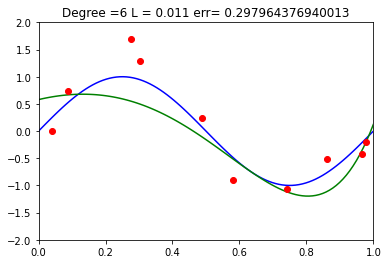

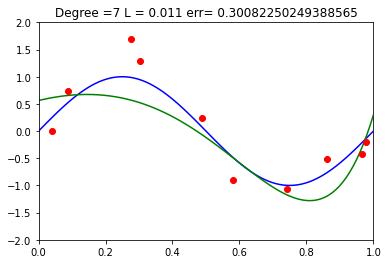

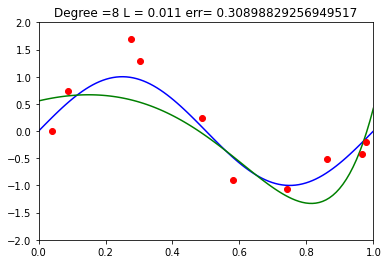

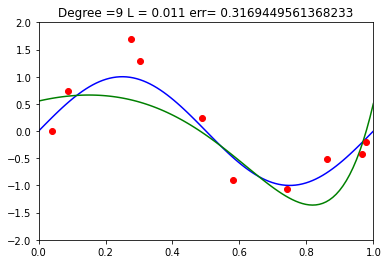

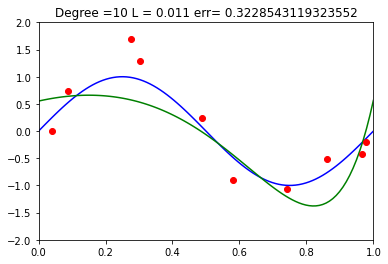

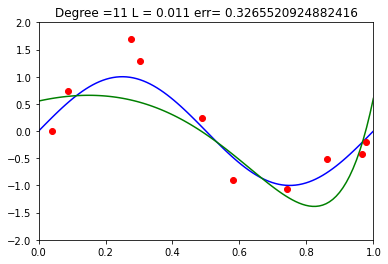

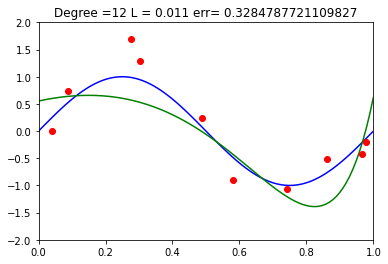

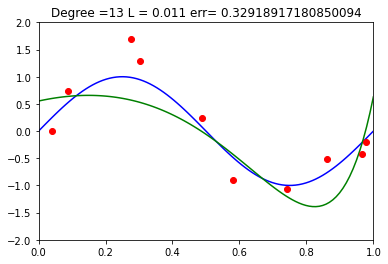

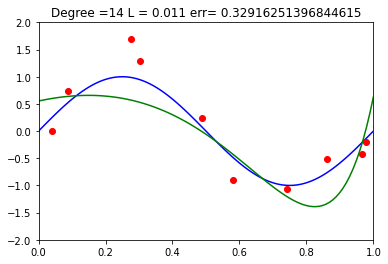

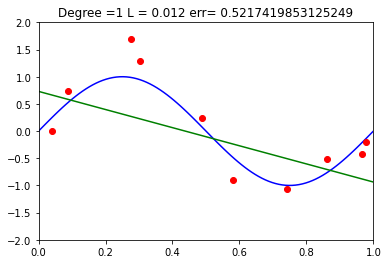

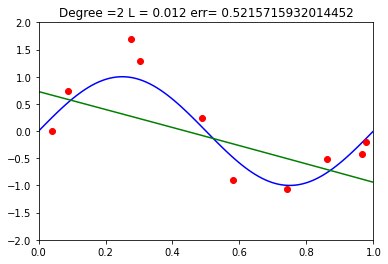

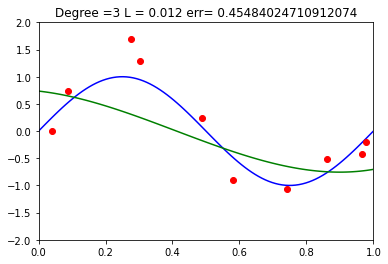

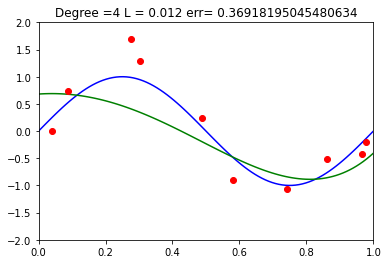

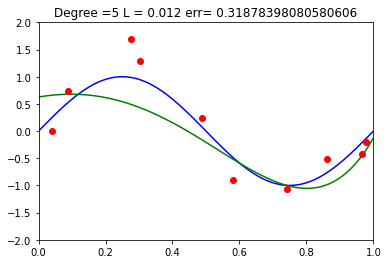

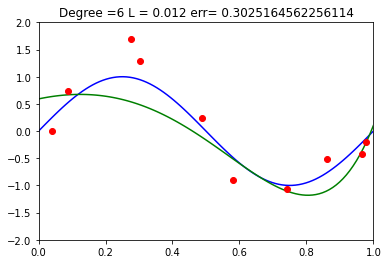

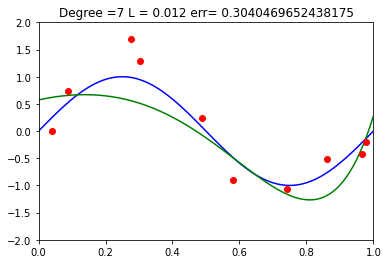

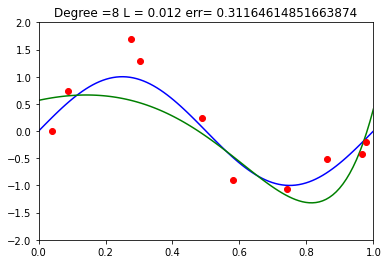

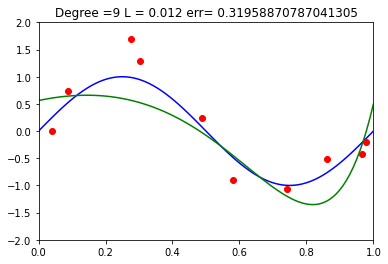

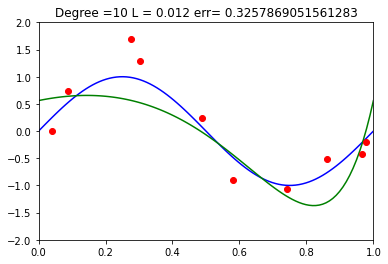

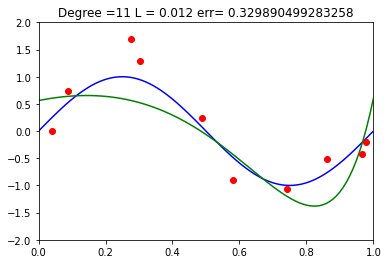

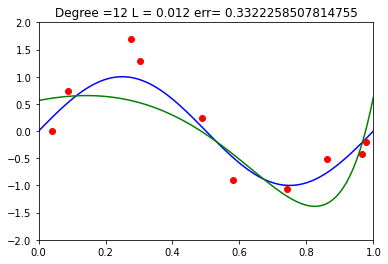

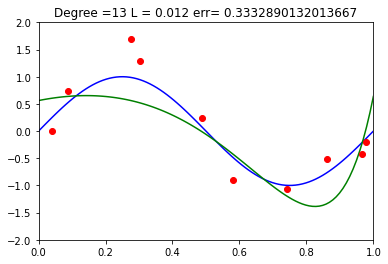

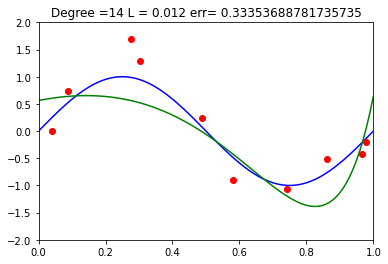

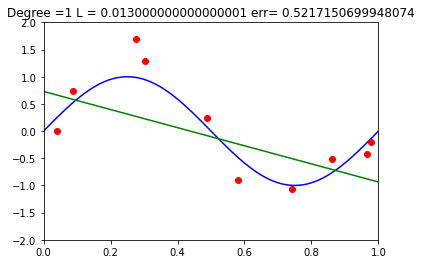

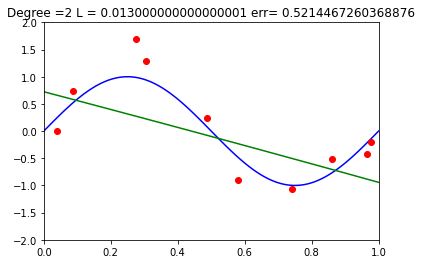

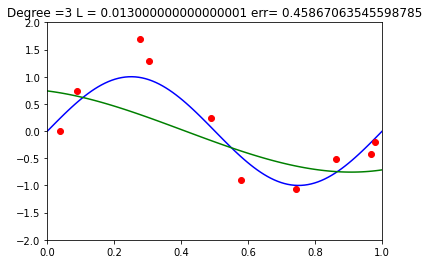

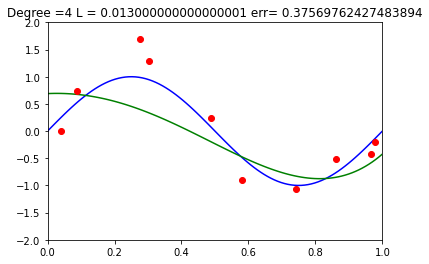

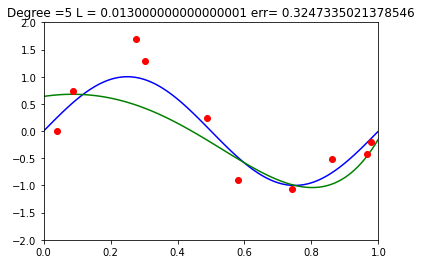

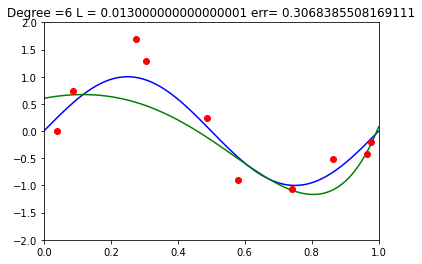

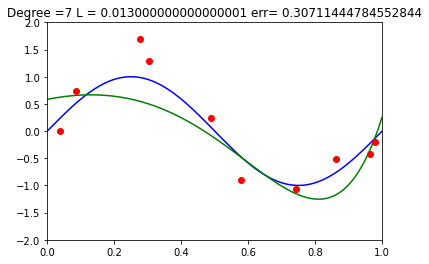

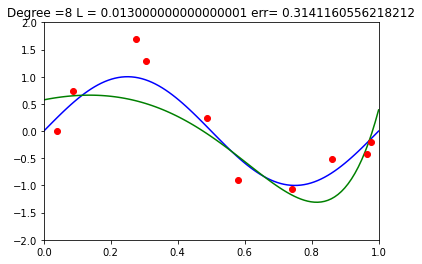

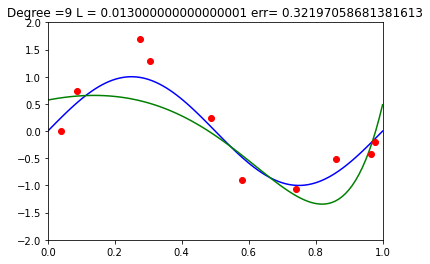

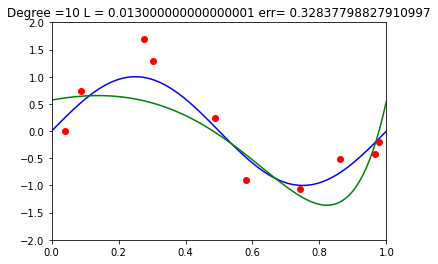

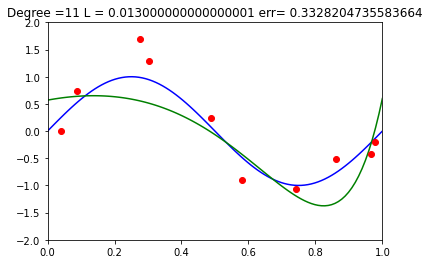

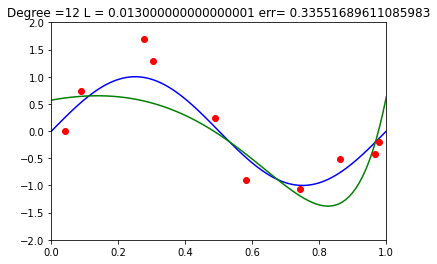

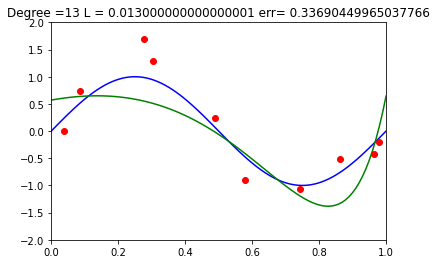

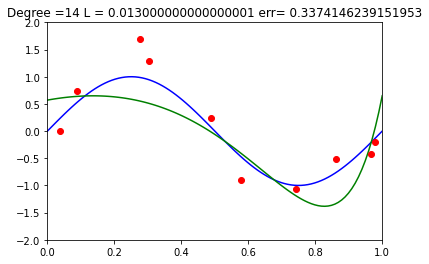

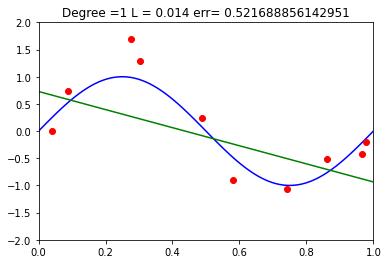

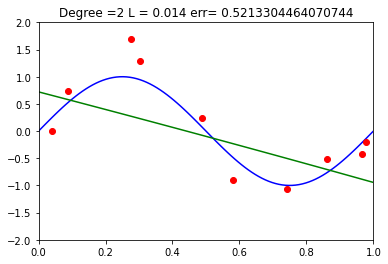

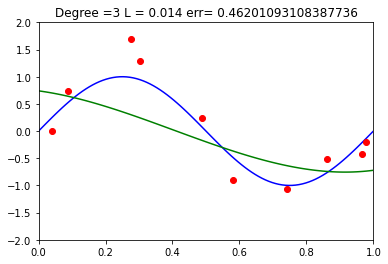

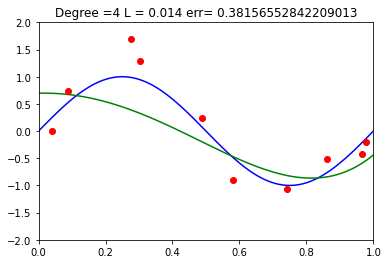

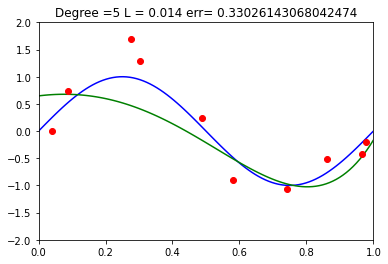

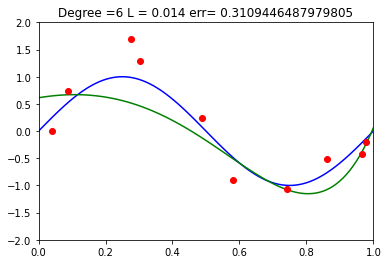

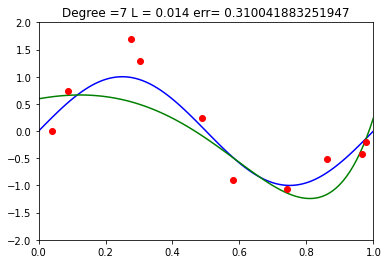

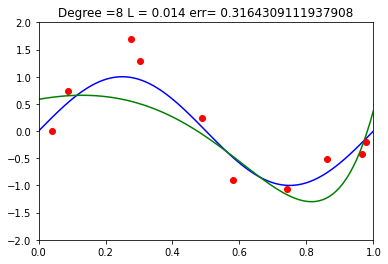

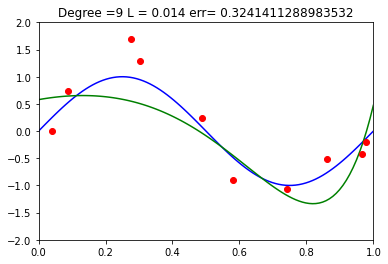

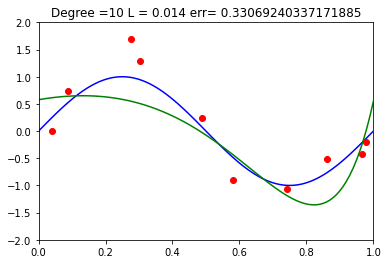

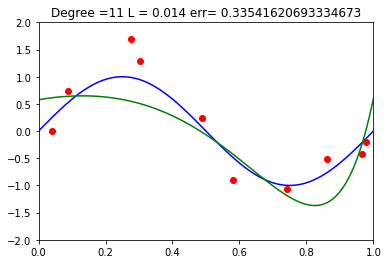

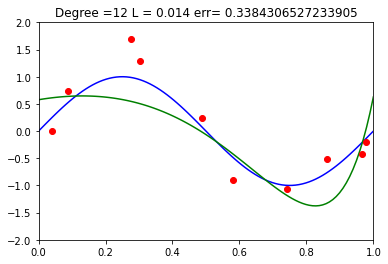

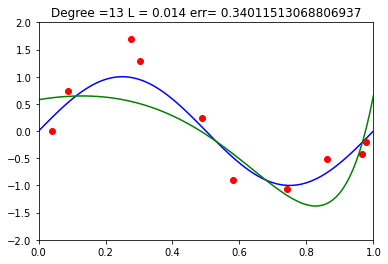

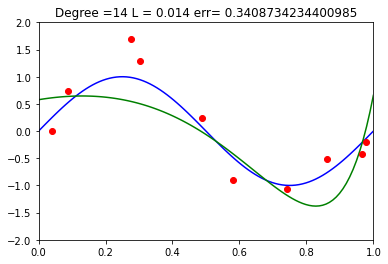

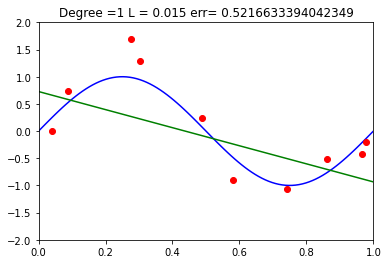

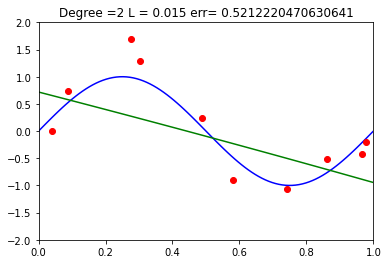

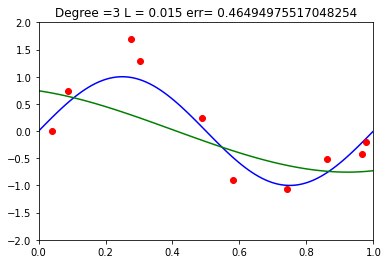

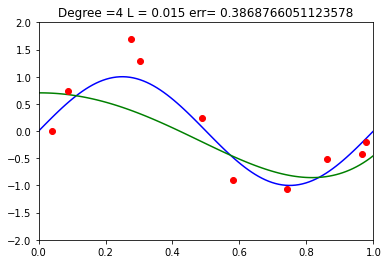

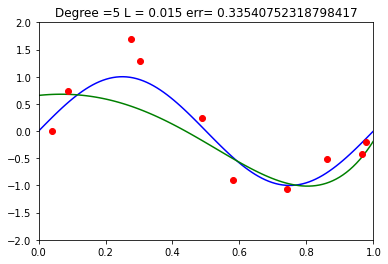

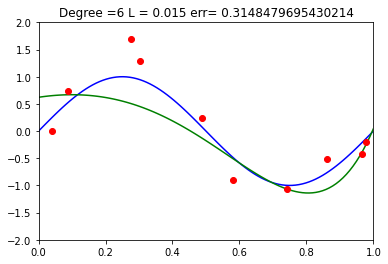

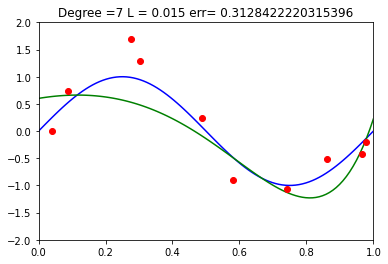

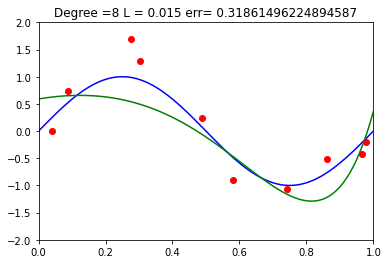

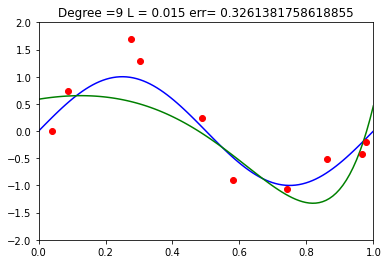

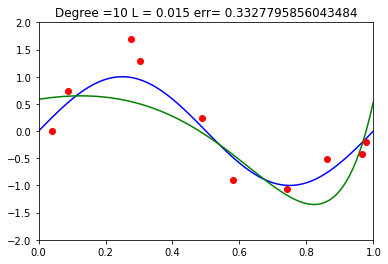

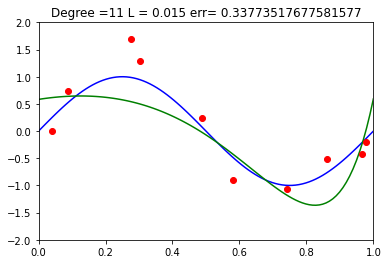

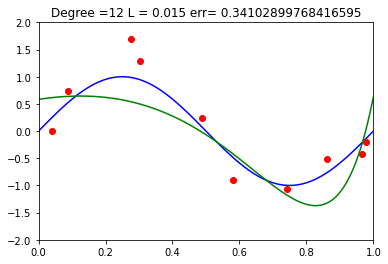

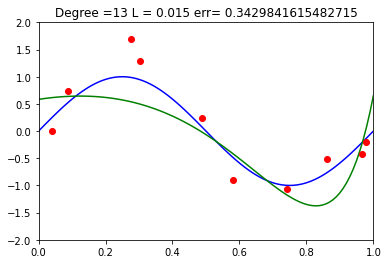

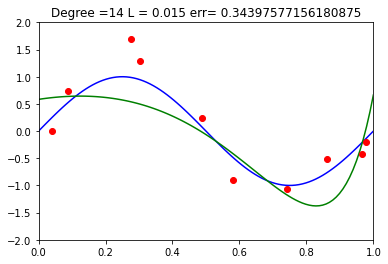

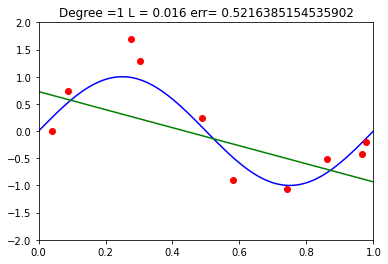

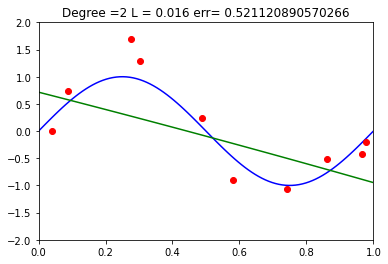

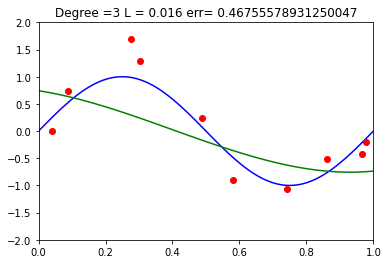

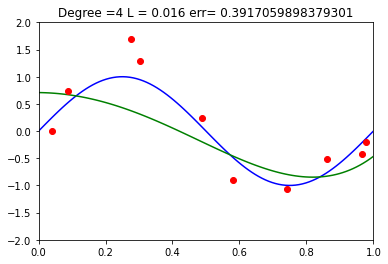

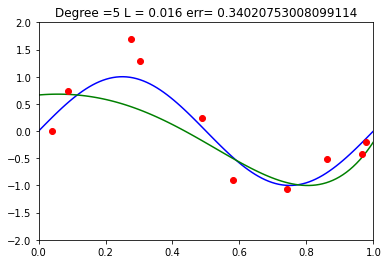

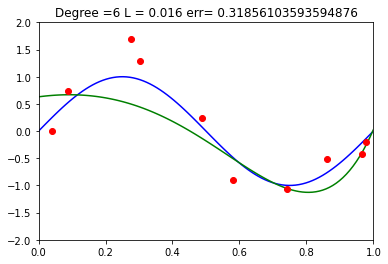

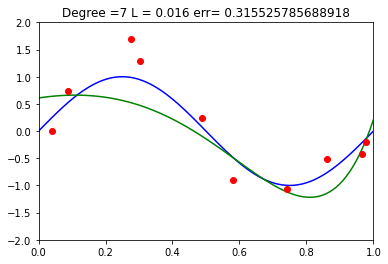

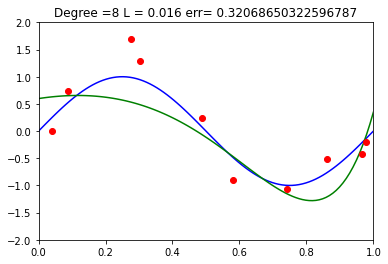

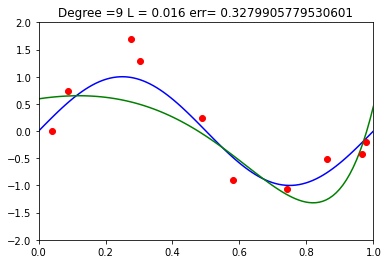

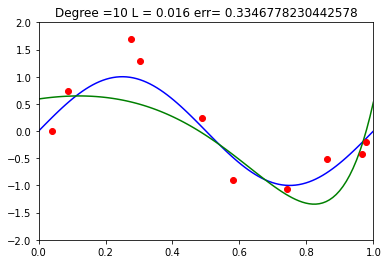

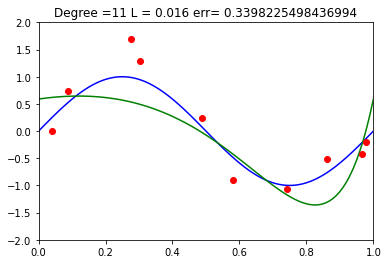

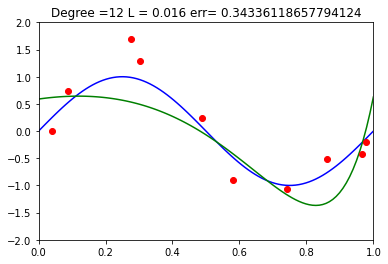

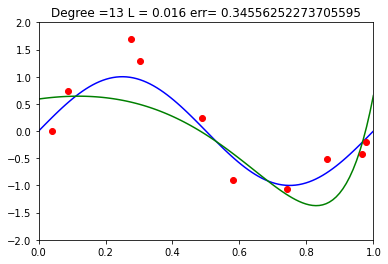

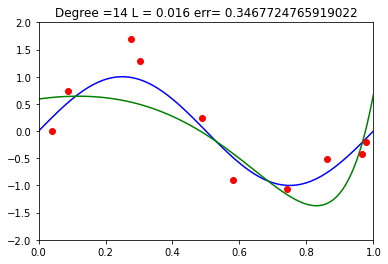

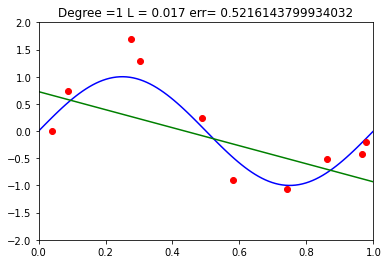

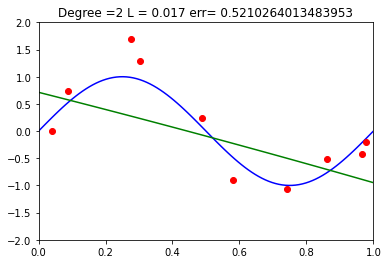

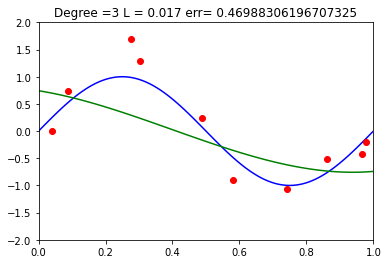

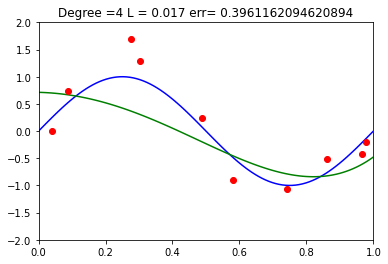

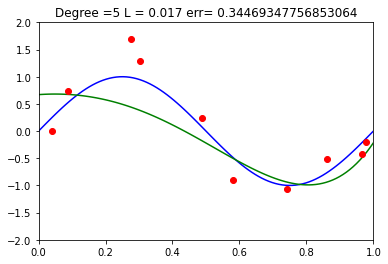

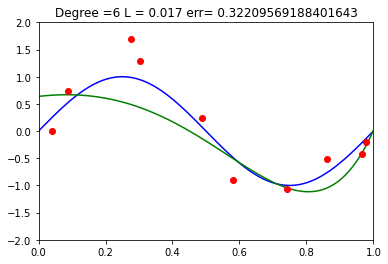

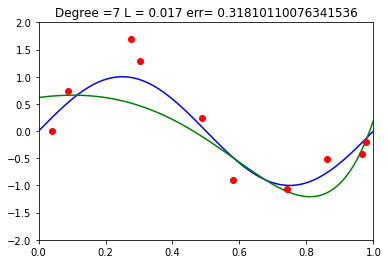

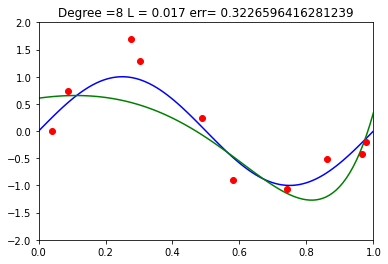

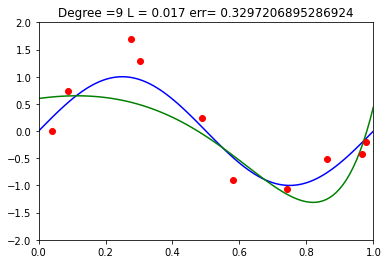

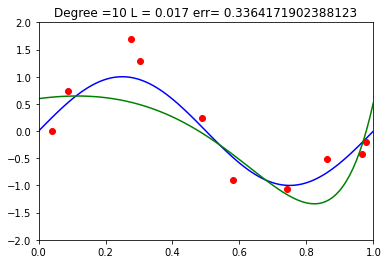

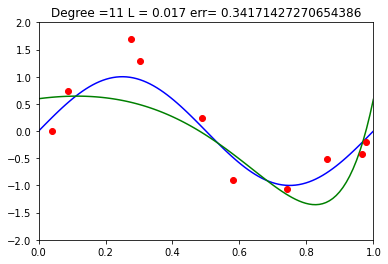

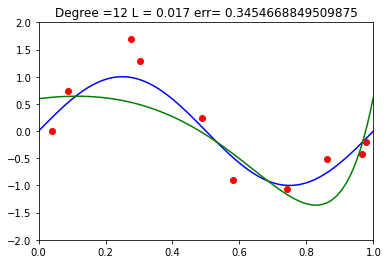

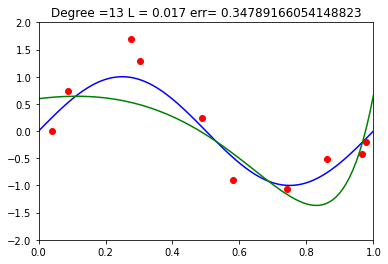

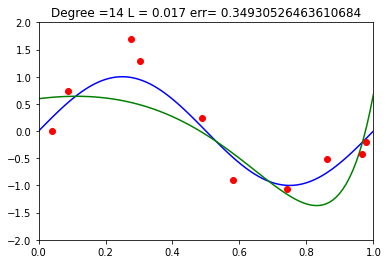

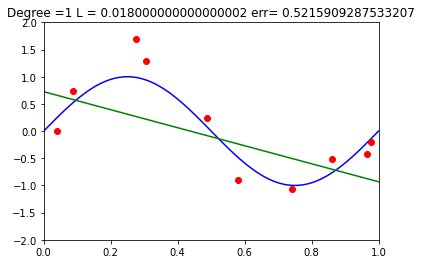

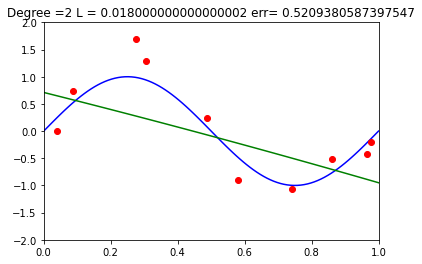

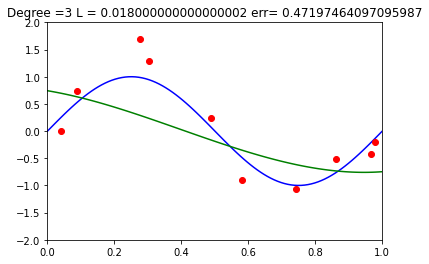

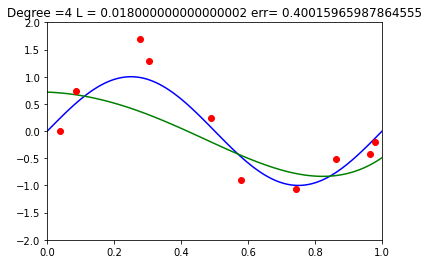

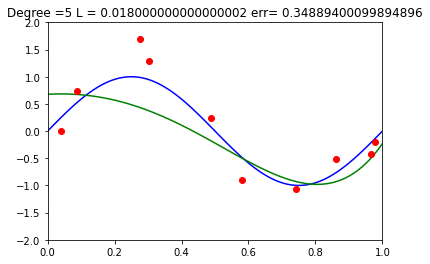

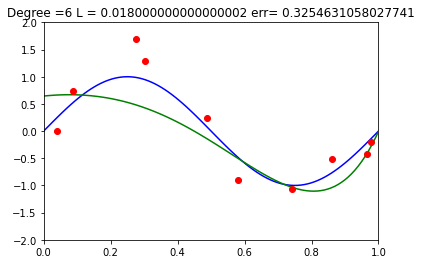

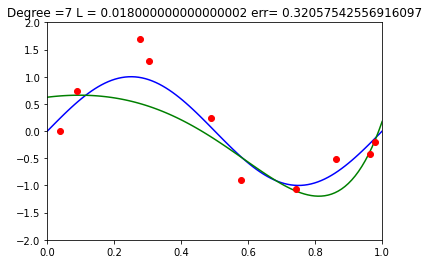

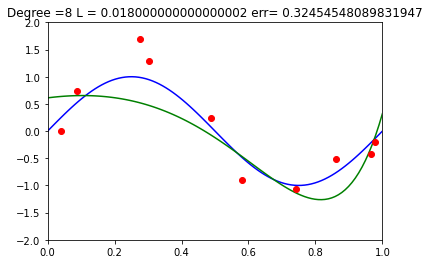

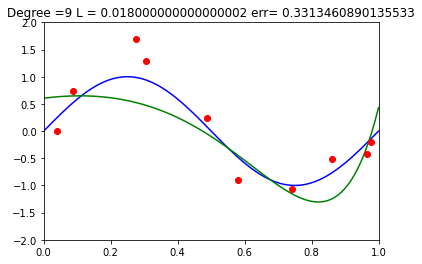

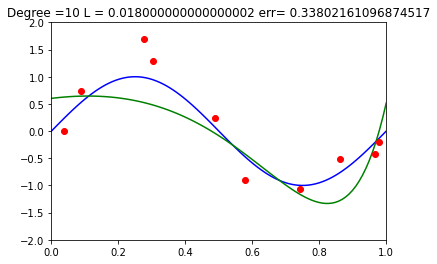

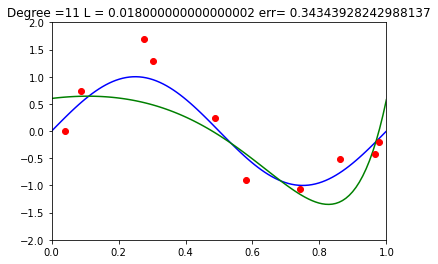

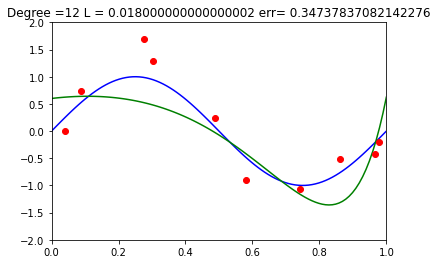

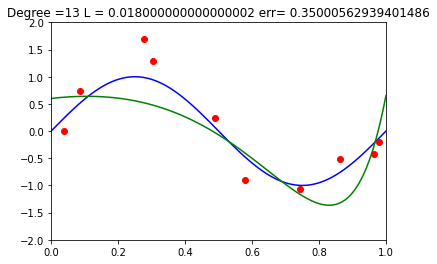

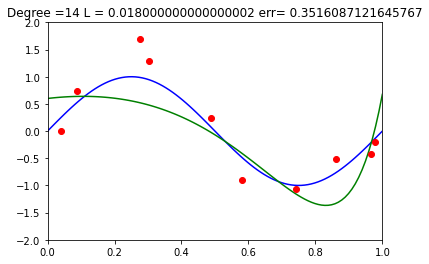

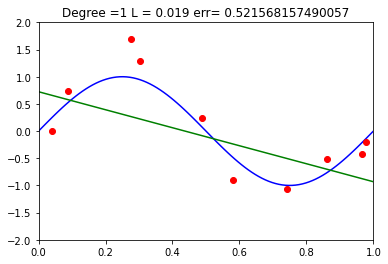

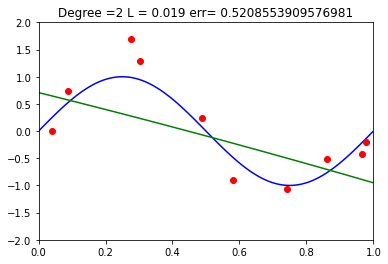

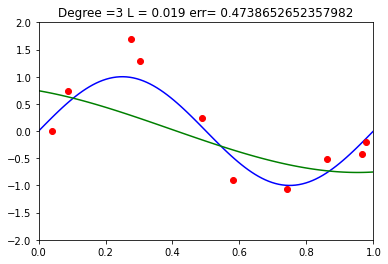

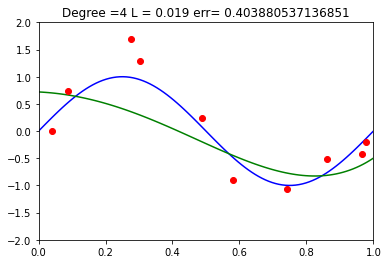

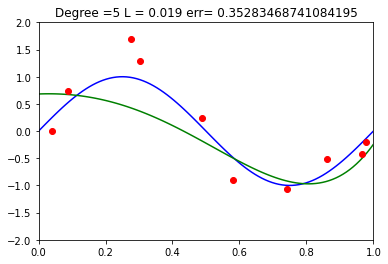

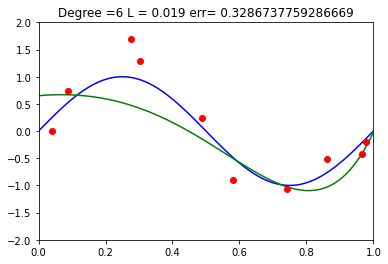

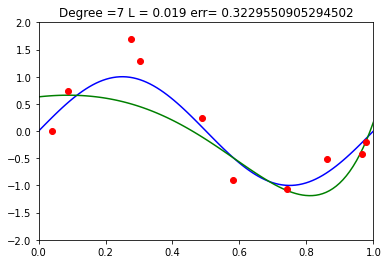

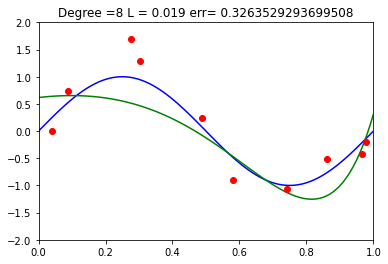

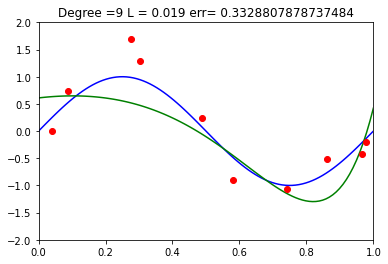

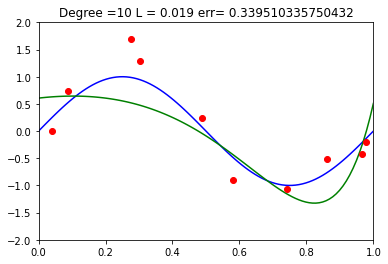

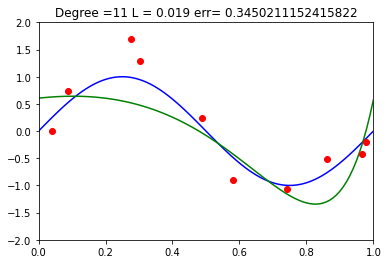

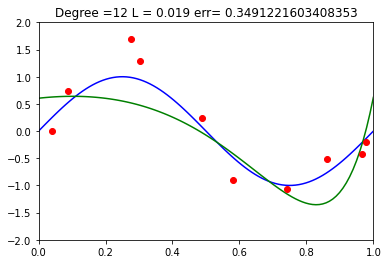

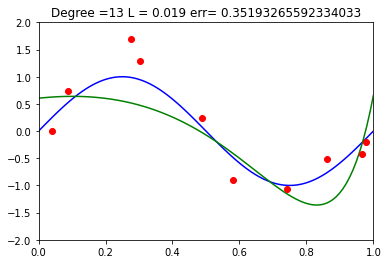

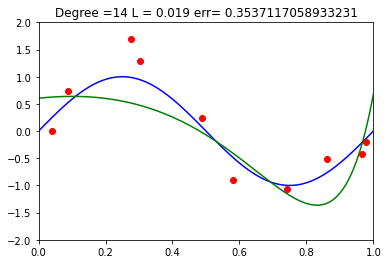

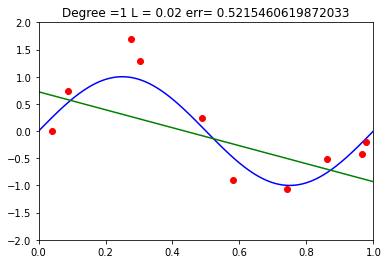

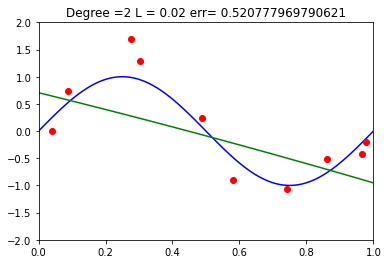

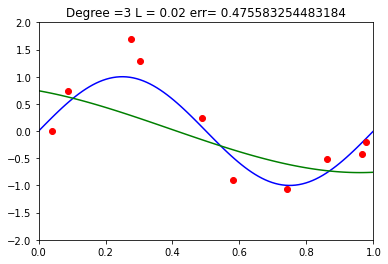

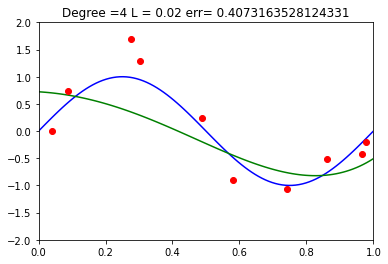

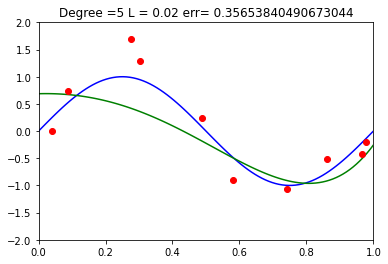

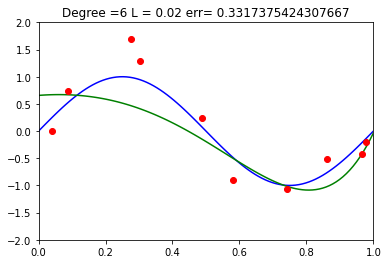

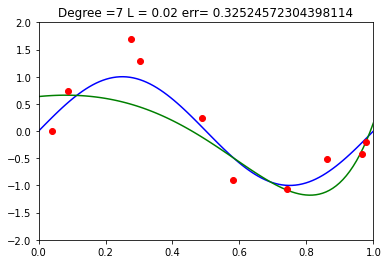

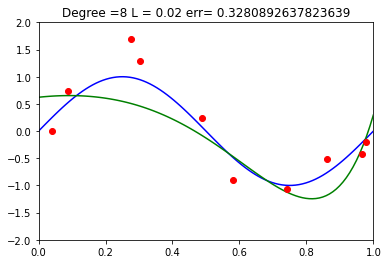

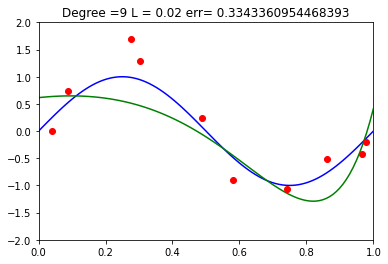

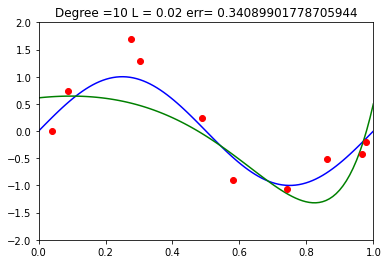

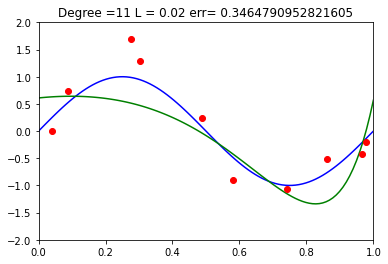

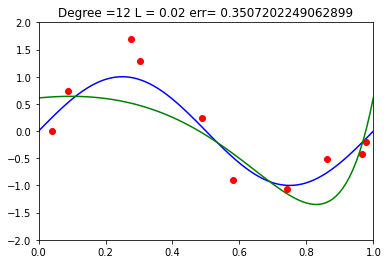

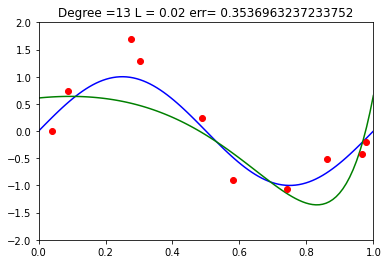

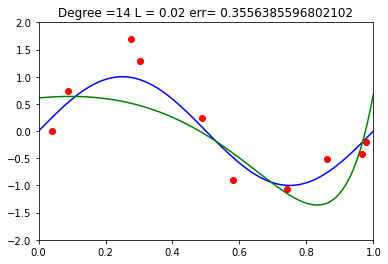

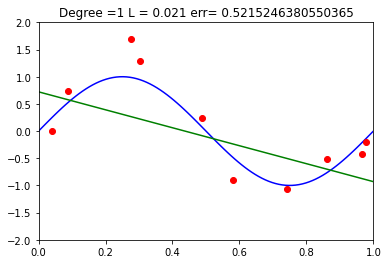

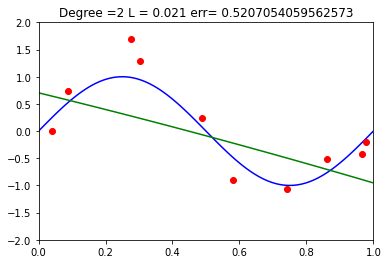

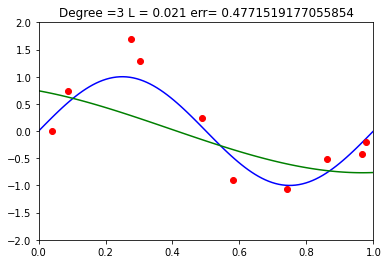

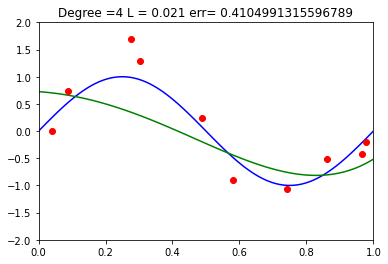

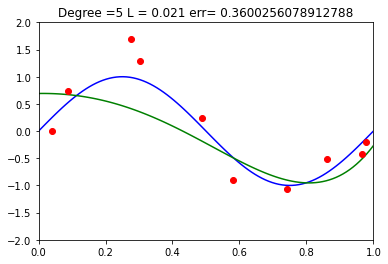

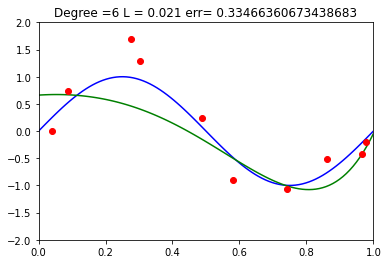

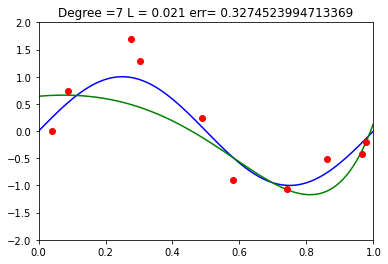

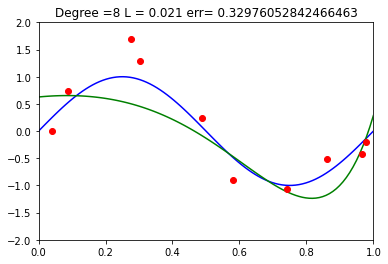

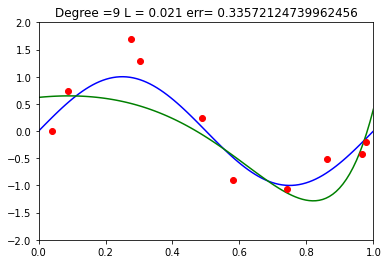

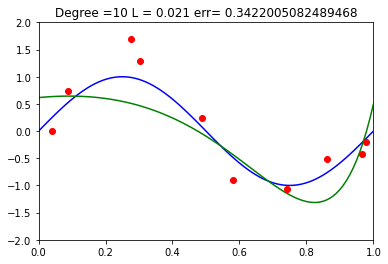

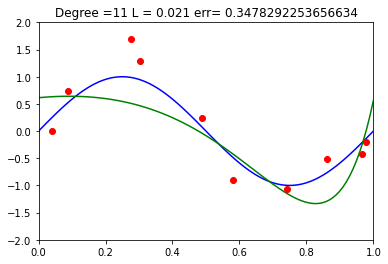

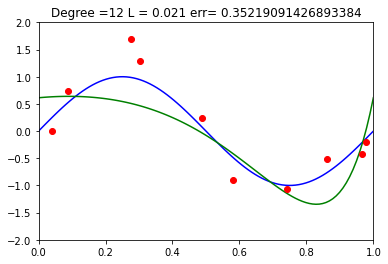

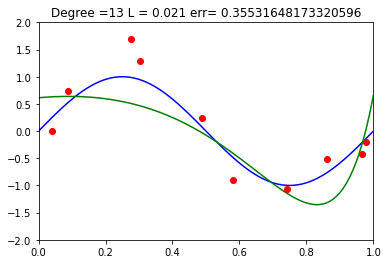

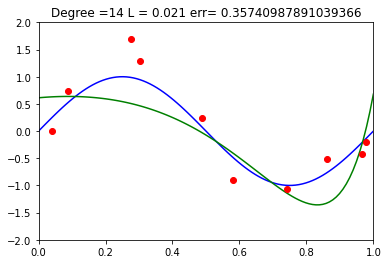

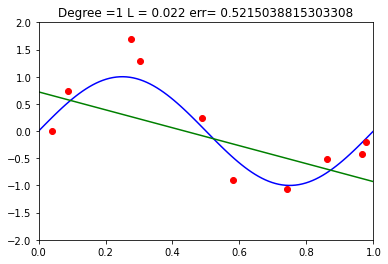

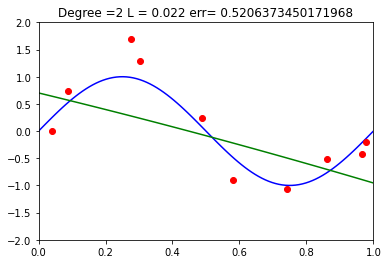

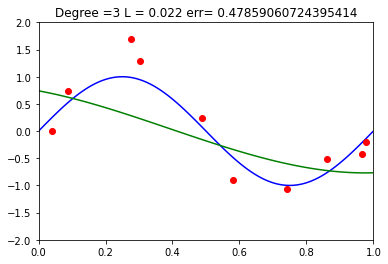

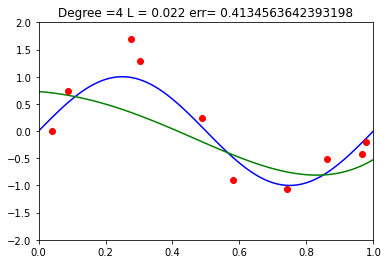

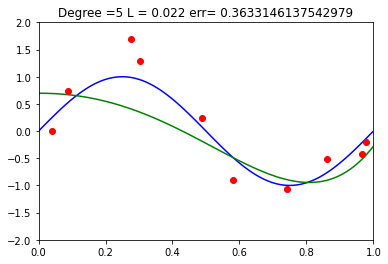

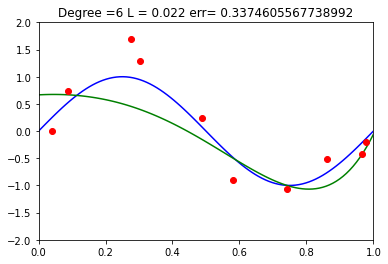

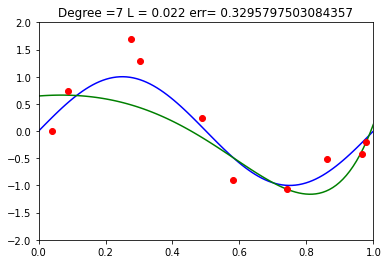

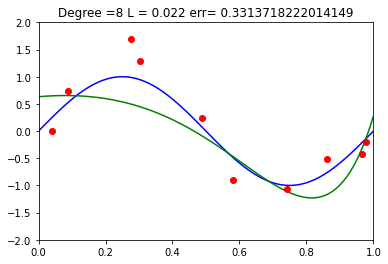

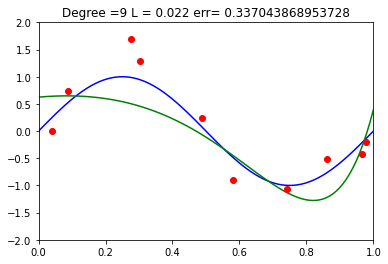

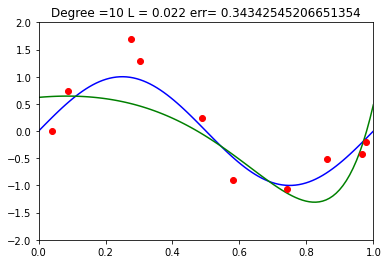

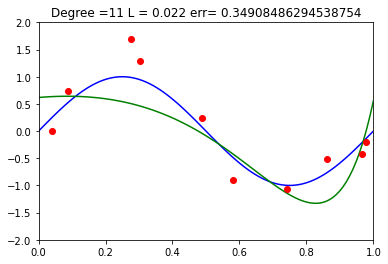

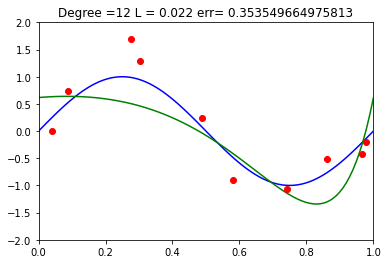

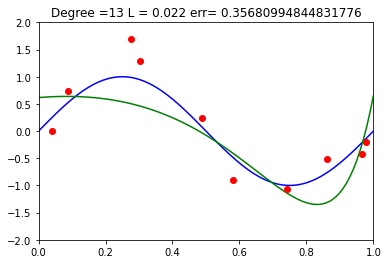

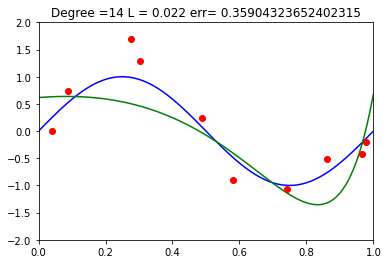

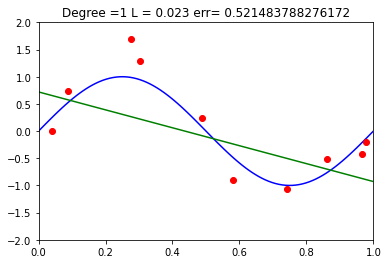

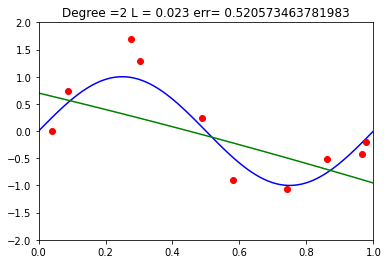

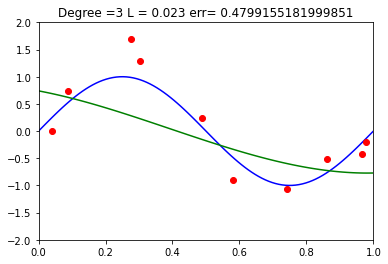

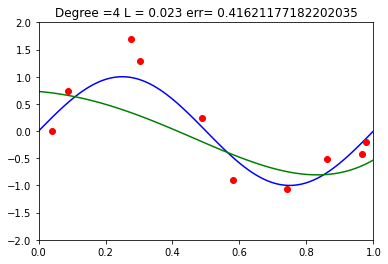

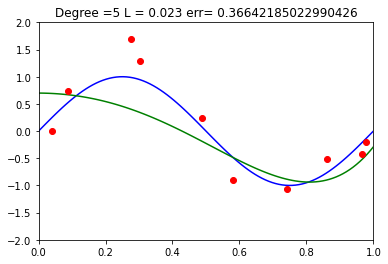

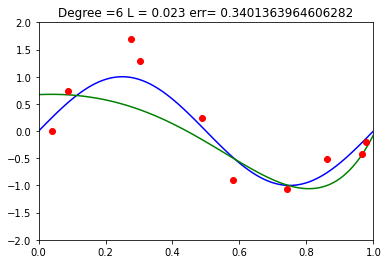

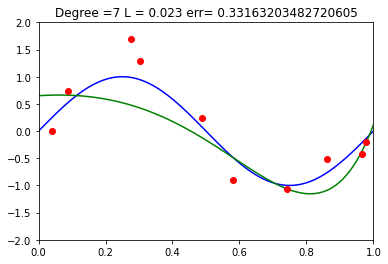

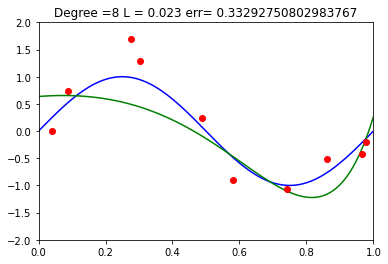

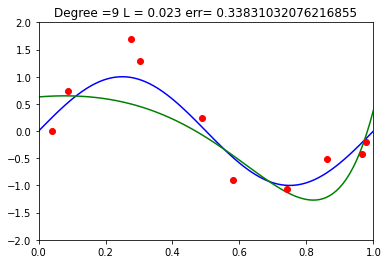

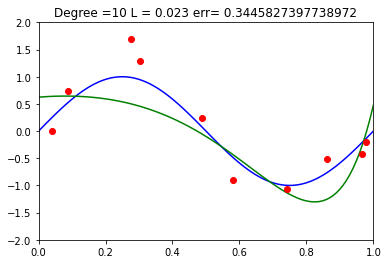

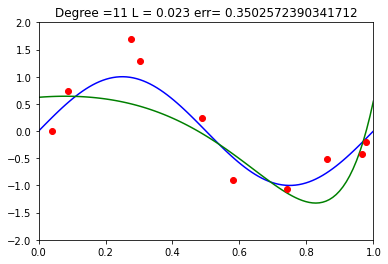

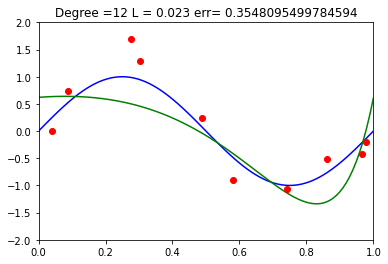

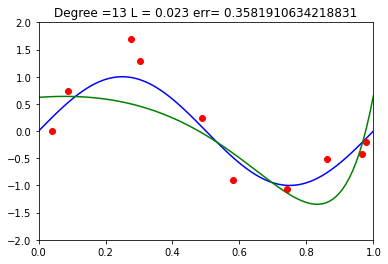

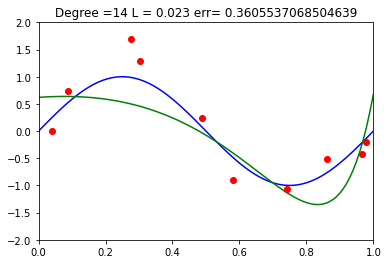

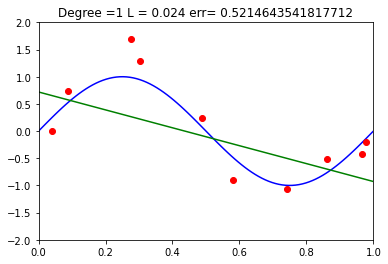

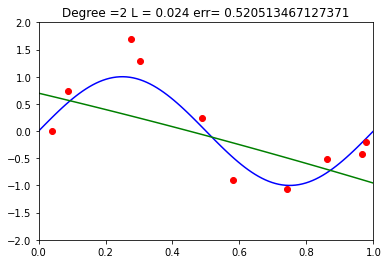

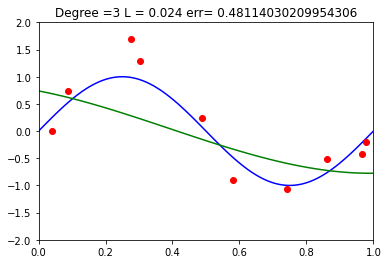

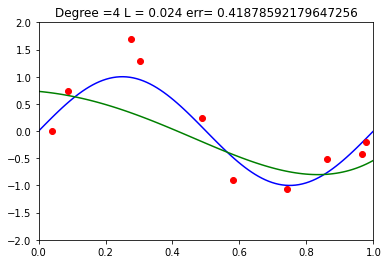

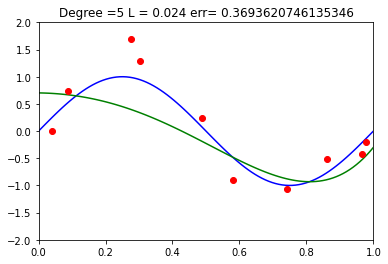

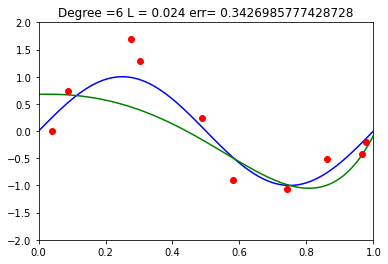

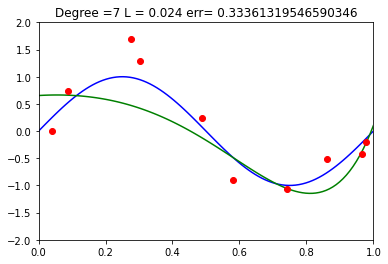

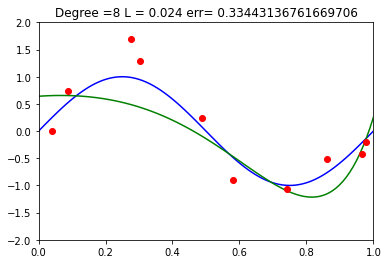

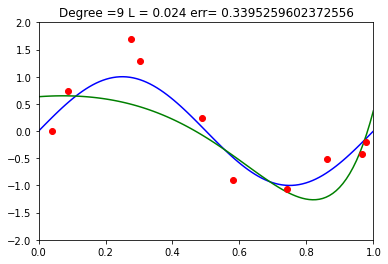

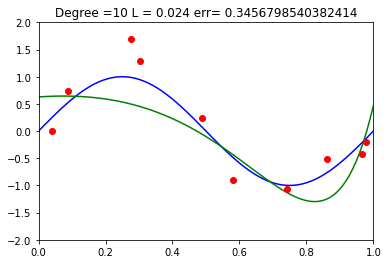

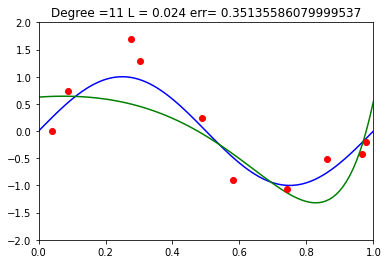

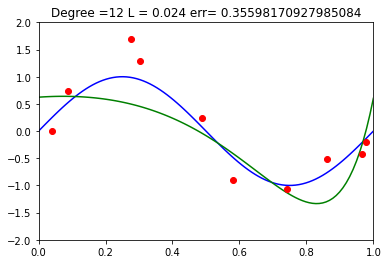

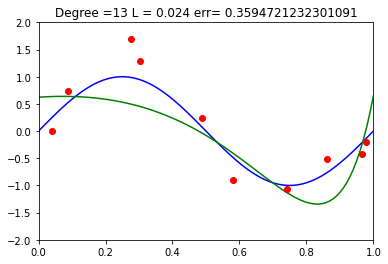

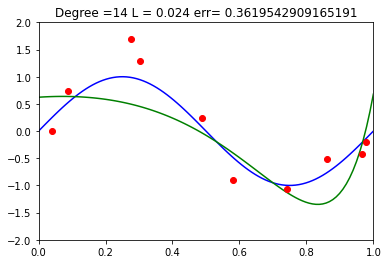

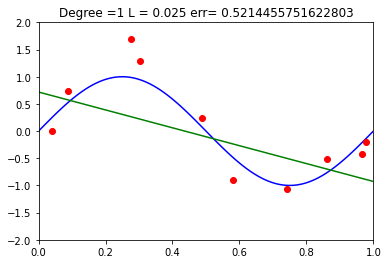

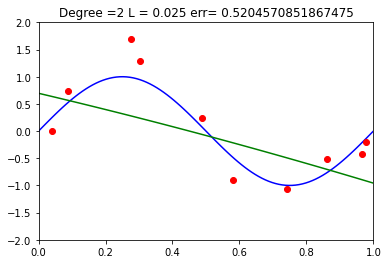

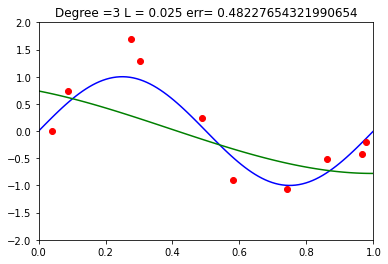

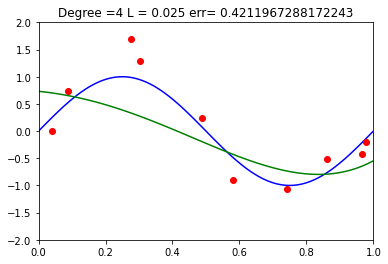

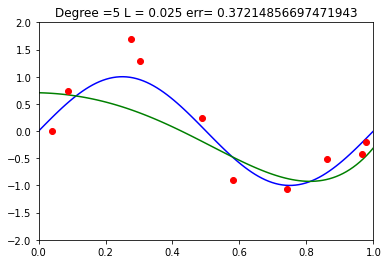

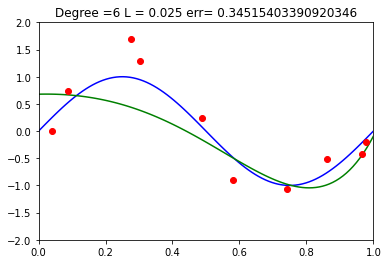

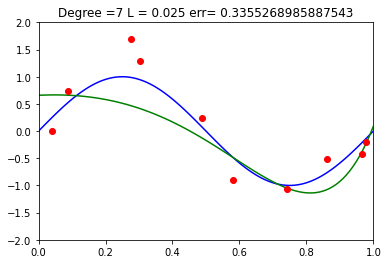

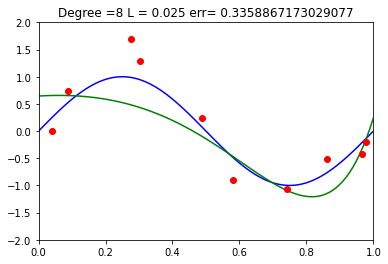

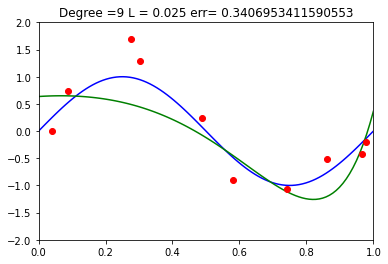

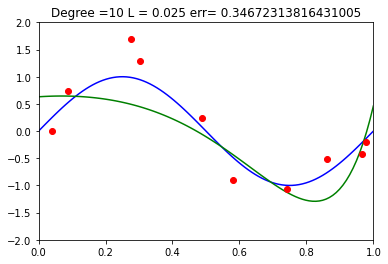

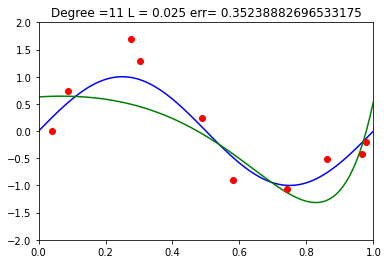

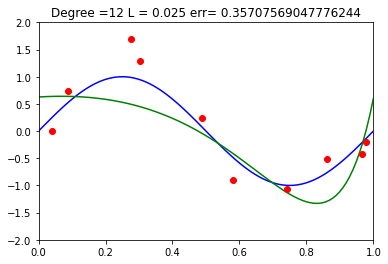

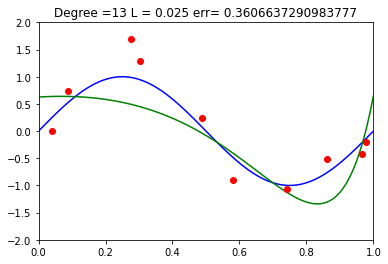

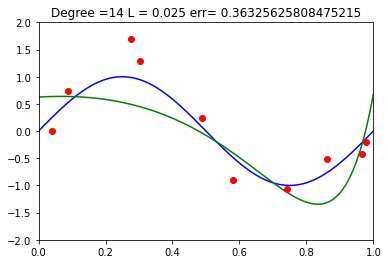

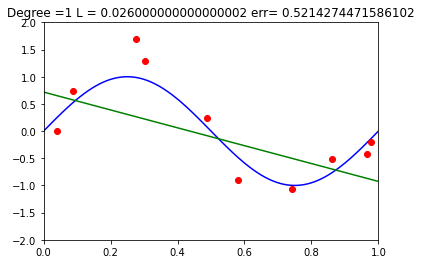

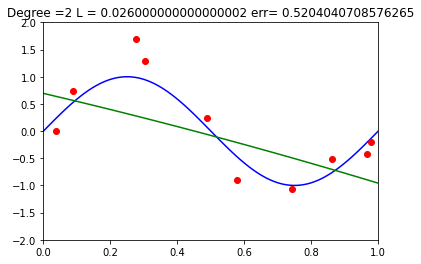

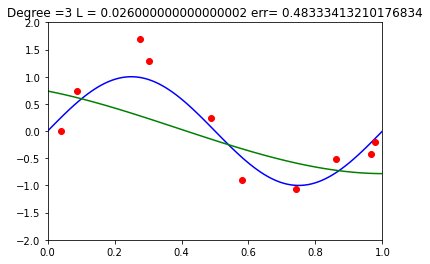

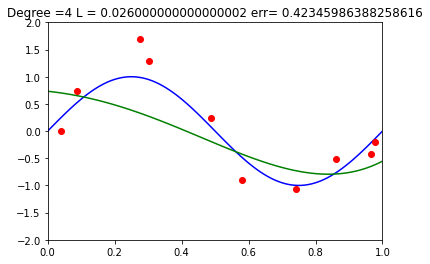

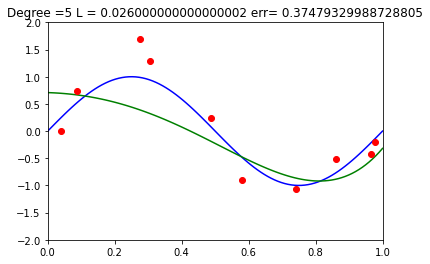

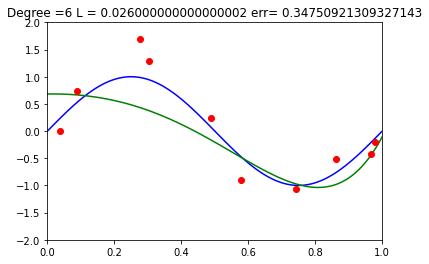

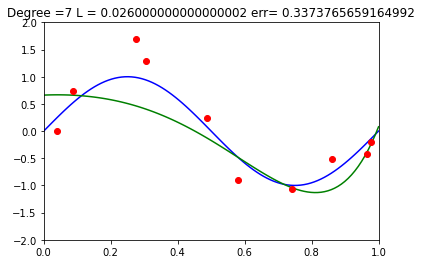

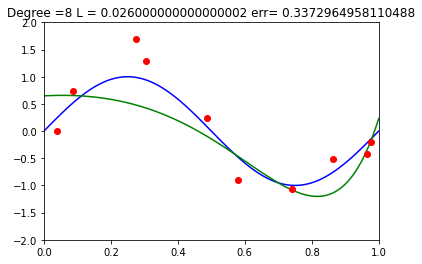

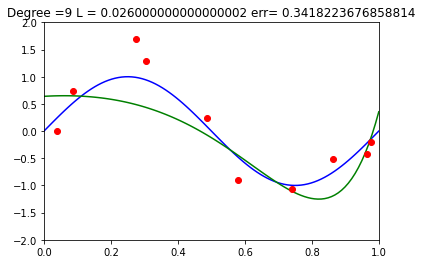

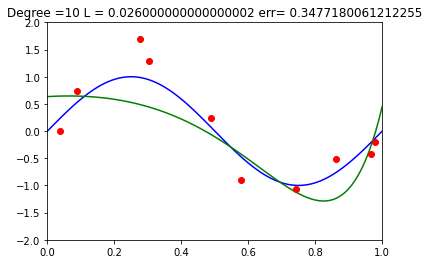

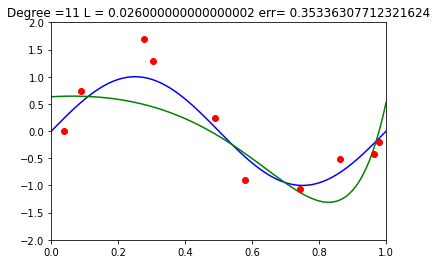

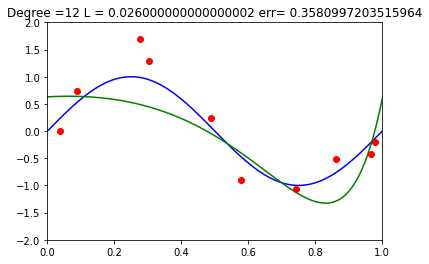

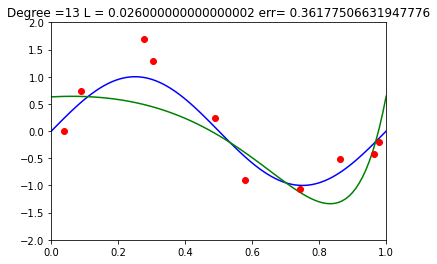

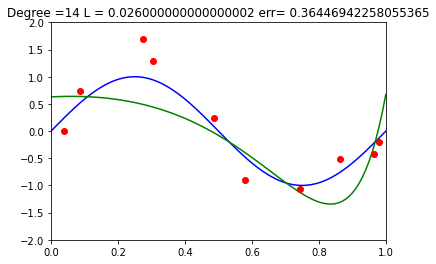

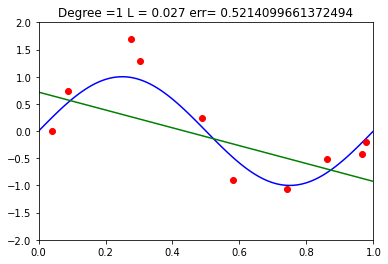

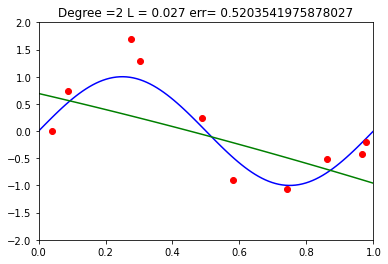

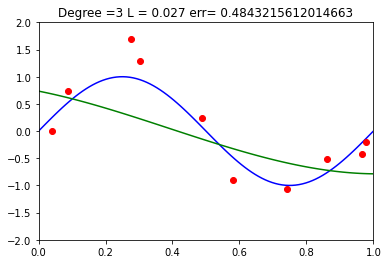

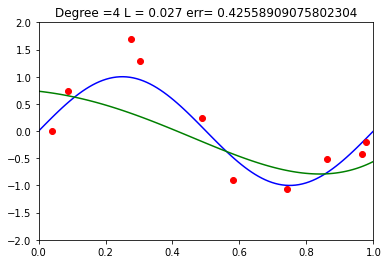

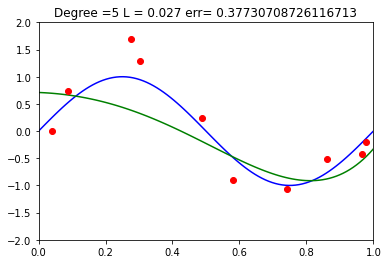

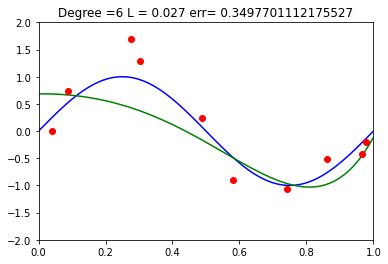

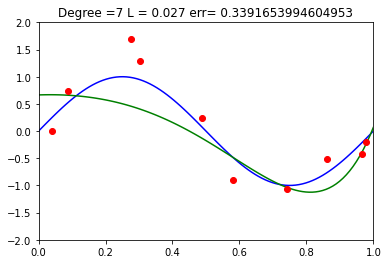

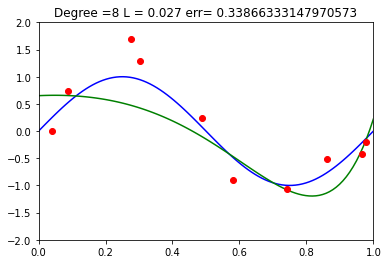

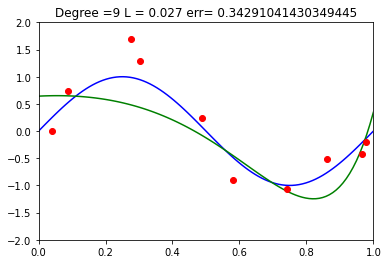

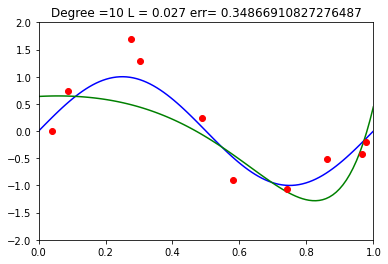

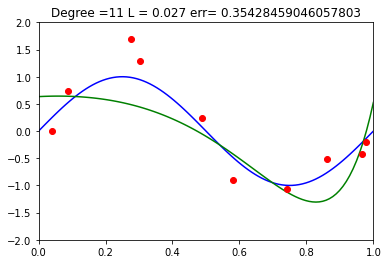

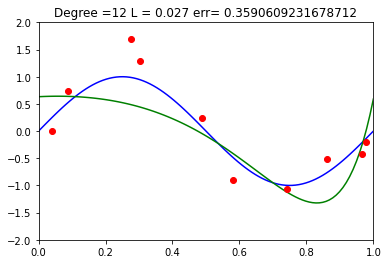

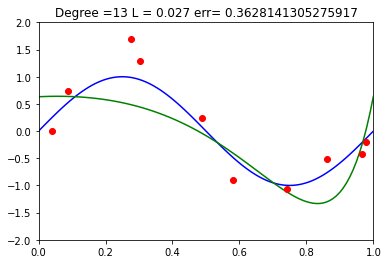

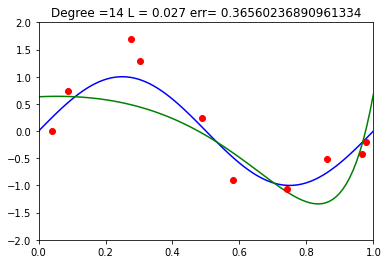

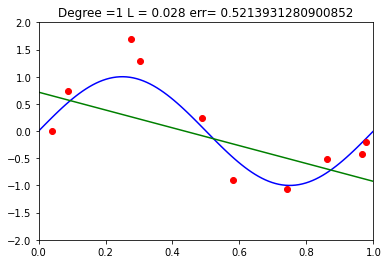

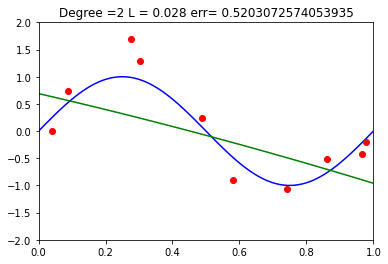

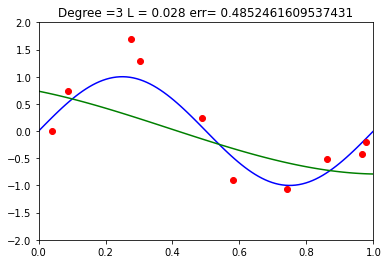

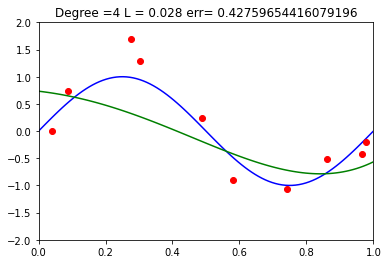

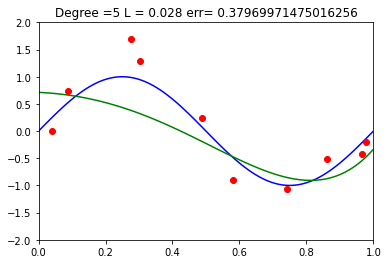

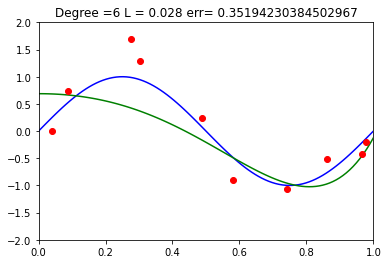

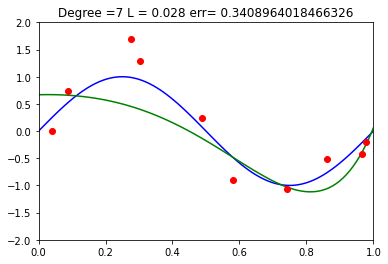

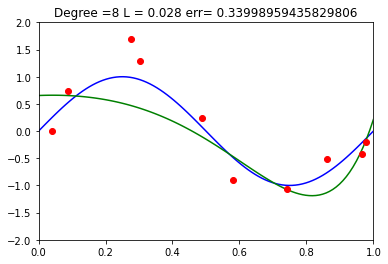

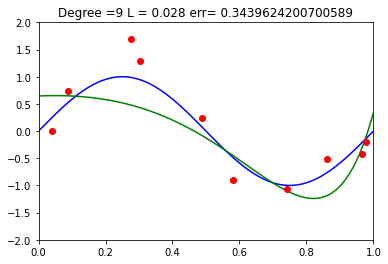

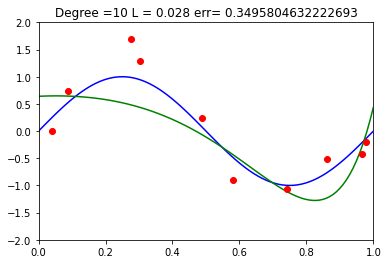

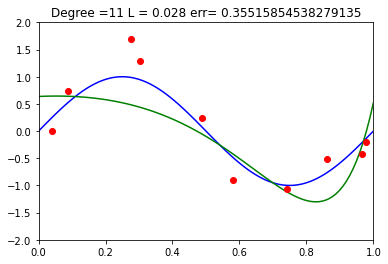

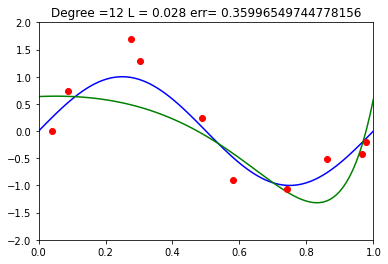

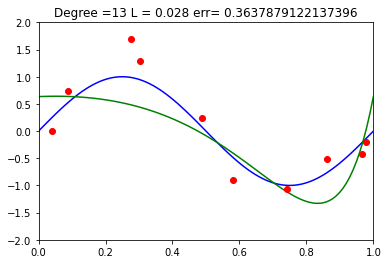

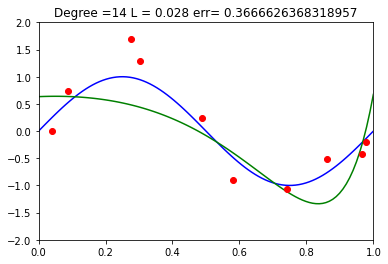

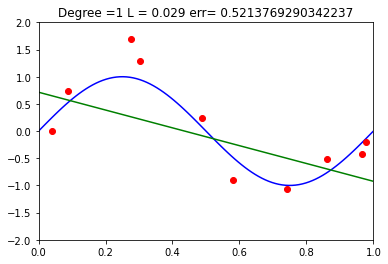

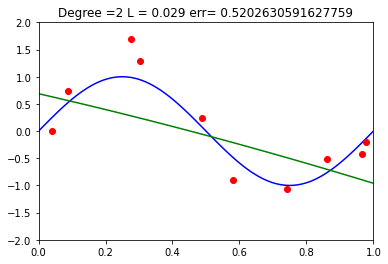

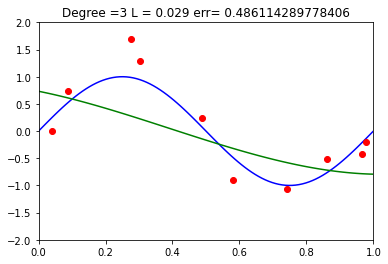

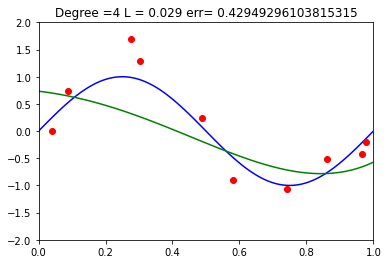

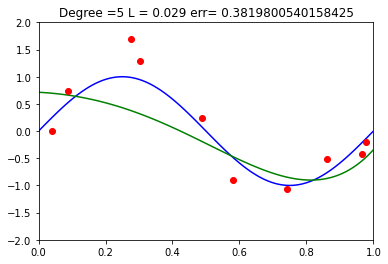

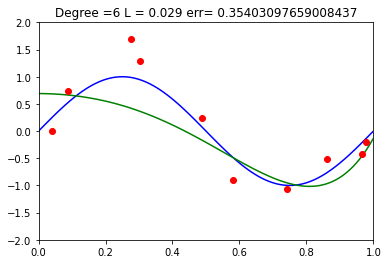

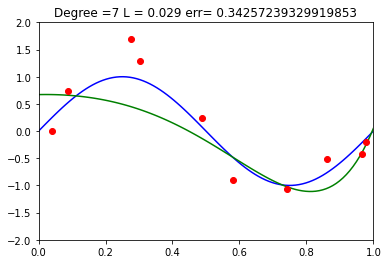

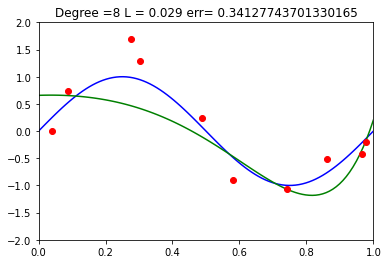

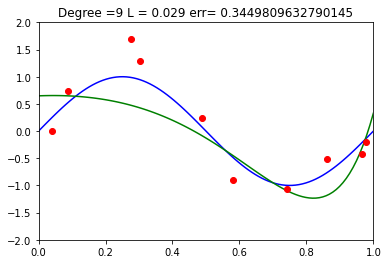

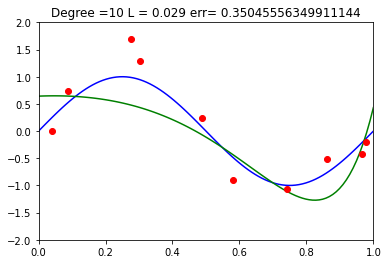

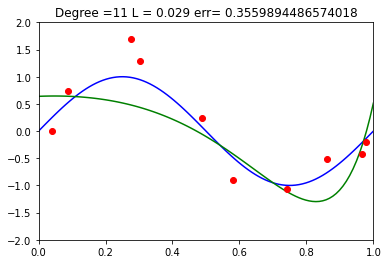

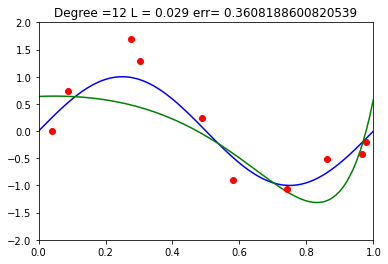

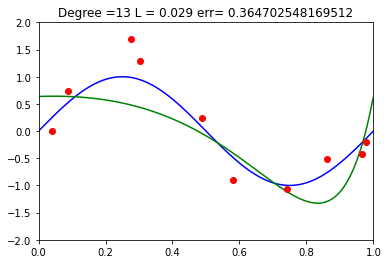

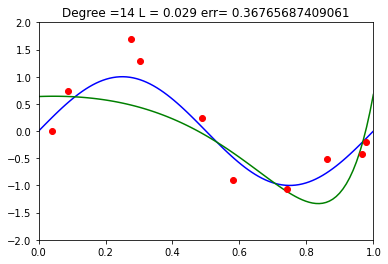

In [6]:
results = []
for l in np.arange(0, 0.03, 0.001):
    for j in range(1, 15, 1):
        w = calculate_weights(X_train, y_train, j, l)
        predict = np.array(list(map(lambda x: polynom_new(x=x, w=w), X_test)))
        diff = mean_squared_error(y_test, predict)
        results.append((j, l, diff))
        
        plt.title('Degree =' + str(j) + ' L = ' + str(l) + " err= " + str(diff))
        plt.plot(z, polynom_orig(z), 'b-')
        plt.plot(z, polynom_new(z, w), 'g-')
        plt.plot(X_test, y_test, 'ro')
        plt.xlim(0, 1)
        plt.ylim(-2, 2)
        plt.show()

In [7]:
for t in (sorted(results, key=lambda t: t[2])):
    print('Degree = ', t[0], ' L = ', t[1], ' Err = ', t[2])

Degree =  8  L =  0.0  Err =  0.11920239146974812
Degree =  7  L =  0.0  Err =  0.13068392774666338
Degree =  6  L =  0.0  Err =  0.13341752114752556
Degree =  4  L =  0.0  Err =  0.1382216059779747
Degree =  5  L =  0.0  Err =  0.1446755485352908
Degree =  3  L =  0.0  Err =  0.14794333892427172
Degree =  4  L =  0.001  Err =  0.19794401111516294
Degree =  12  L =  0.0  Err =  0.19816695148798588
Degree =  13  L =  0.001  Err =  0.20227661045471712
Degree =  12  L =  0.001  Err =  0.20228043094337197
Degree =  14  L =  0.001  Err =  0.2024008742045073
Degree =  11  L =  0.001  Err =  0.20289775939618476
Degree =  10  L =  0.001  Err =  0.20475416434697297
Degree =  9  L =  0.001  Err =  0.2084004784923498
Degree =  9  L =  0.0  Err =  0.20904088574234536
Degree =  5  L =  0.001  Err =  0.21062474918221205
Degree =  8  L =  0.001  Err =  0.21375176510671
Degree =  7  L =  0.001  Err =  0.21902312500249646
Degree =  6  L =  0.001  Err =  0.2197056902710499
Degree =  10  L =  0.0  Err = 